In [5]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import nsepy as nse 
from nsepy import get_history
import mplfinance as mpf
import matplotlib.animation as animation
from nsetools import Nse

In [3]:
!pip install nsetools

In [6]:
nifty=pd.read_csv('NIFTY500.csv')

In [7]:
#symbol=nifty[['SYMBOL']]
nifty.columns


Index(['Company Name', 'Industry', 'Symbol', 'Series', 'ISIN Code'], dtype='object')

In [8]:
nifty.shape

(501, 5)

In [9]:
#nifty.info

In [10]:
mc = mpf.make_marketcolors(up='g',down='r',edge='black',volume='gray',ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

In [7]:
 #rising_stock=get_history("TCS",start=datetime(2021,1,1),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
 #rising_stock.head()   

In [8]:
#rising_stock.reset_index('Date',inplace=True)
#rising_stock.columns


# Add a row

In [ ]:

for index, row in nifty.iterrows():
    symbol="ACC" #row["Symbol"]
    d = datetime.today() - timedelta(days=1)
    day=datetime.now().day
    month=datetime.now().month
    year=datetime.now().year
    df1=get_history(symbol,start=datetime(d.year,d.month,d.day),end=datetime(year,month,day))
    df1=pd.DataFrame(df1)
    #print(df1)
    #df1
    df1.reset_index('Date',inplace=True)
    df1['Date'] = pd.to_datetime(df1.Date)
    df1.set_index('Date',inplace=True)
    df2=pd.read_csv(f'stocks/{symbol}.csv',index_col=0,parse_dates=True)
    #df2.drop(df.head(2).index,inplace=True)
    df3 = pd.concat([df2, df1])
    df3.to_csv(f"stocks/{symbol}.csv")




In [12]:
#rising_stock['Date'] = pd.to_datetime(rising_stock.Date)

In [14]:
# delete a row
for index, row in nifty.iterrows():
    symbol=row["Symbol"]
    df=pd.read_csv(f'stocks/{symbol}.csv',index_col=0,parse_dates=True)
    df.drop(df.tail(1).index,inplace=True)
    df.to_csv(f"stocks/{symbol}.csv")
    

# Get history of stocks and store 

In [8]:
for index, row in nifty.iterrows():
    try:
        symbol=row["Symbol"]
        d = datetime.today() - timedelta(days=150)
        day=datetime.now().day
        month=datetime.now().month
        year=datetime.now().year
        df=get_history(symbol,start=datetime(d.year,d.month,d.day),end=datetime(year,month,day))
        data=pd.DataFrame(df)
        data.to_csv(f"stocks/{symbol}.csv")
    except:
        print("exception occur")

# get pivot pionts

In [10]:
pivots=[]
dates=[]
counter=0
lastPivot=0
Range=[0,0,0,0,0,0,0,0,0,0]
dateRange=[0,0,0,0,0,0,0,0,0,0]

In [19]:
def pivot():
    
    for i in df.index:
        currentMax=max(Range,default=0)
        value=round(df["High"][i],2)
        Range=Range[1:9]
        Range.append(value)
        dateRange=dateRange[1:9]
        dateRange.append(i)
        if currentMax==max(Range,default=0):
            counter+=1
        else:
            counter=0
        if counter==5:
            lastPivot=currentMax
            dateloc=Range.index(lastPivot)
            lastDate=dateRange[dateloc]
            pivots.append(lastPivot)
            dates.append(lastDate)

# Get historical data of all Nifty50 stocks and filter out rising stocks
# Calculating the simple moving average (which is just mean calculated progressively) and add the result as a new column to dataframe

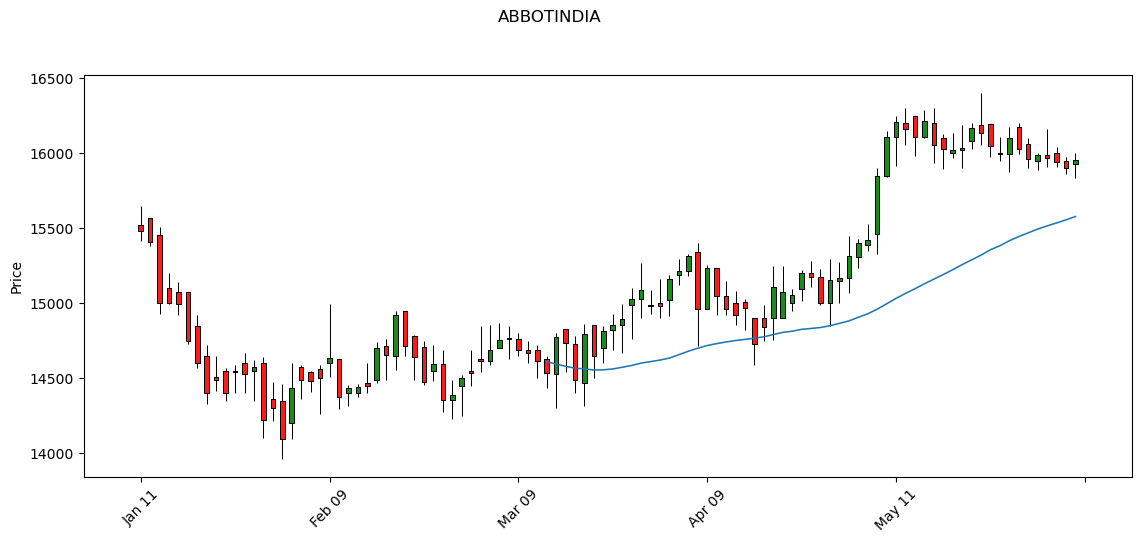

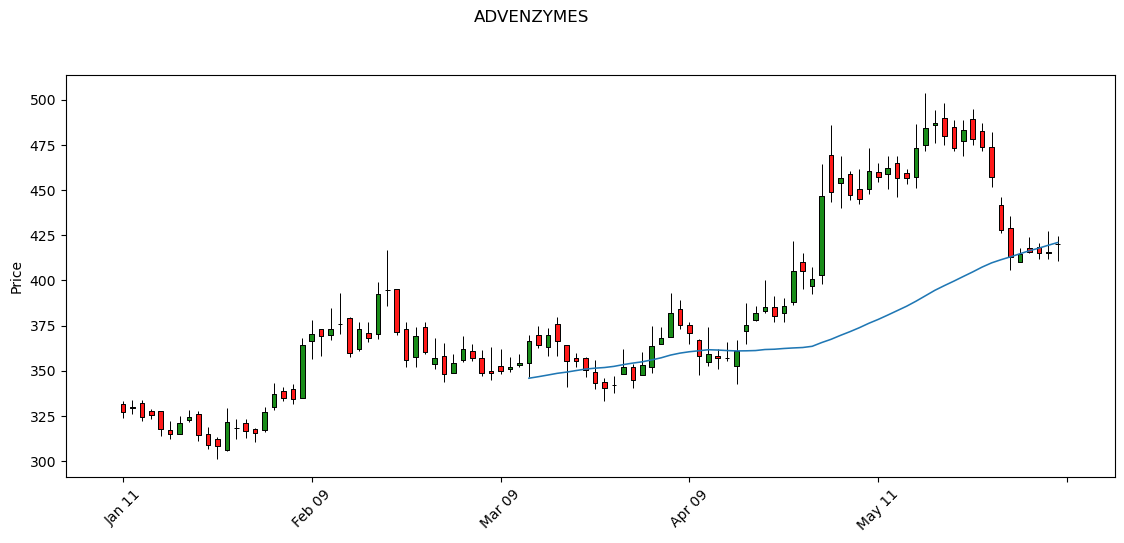

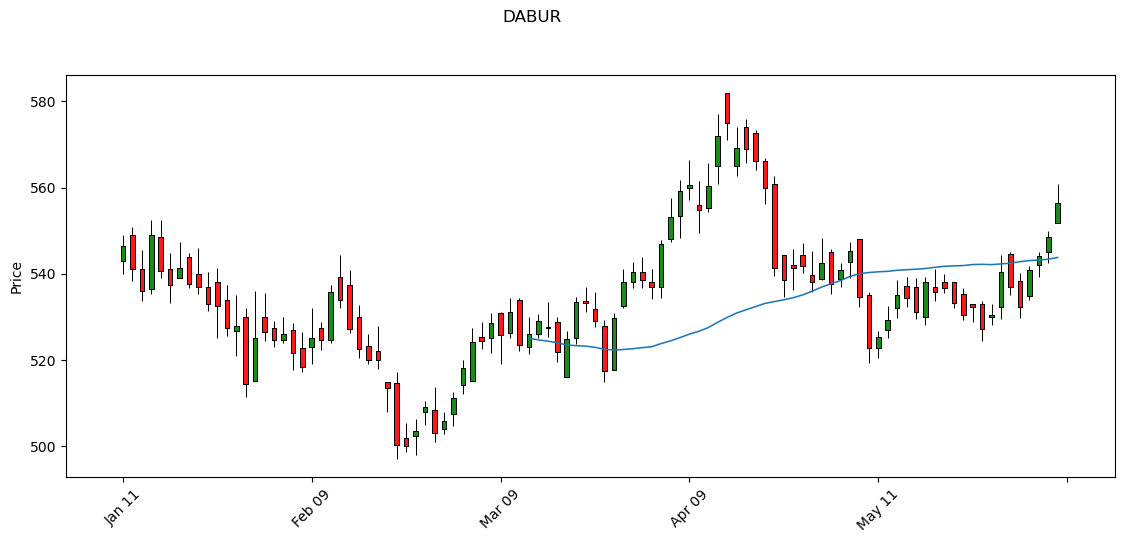

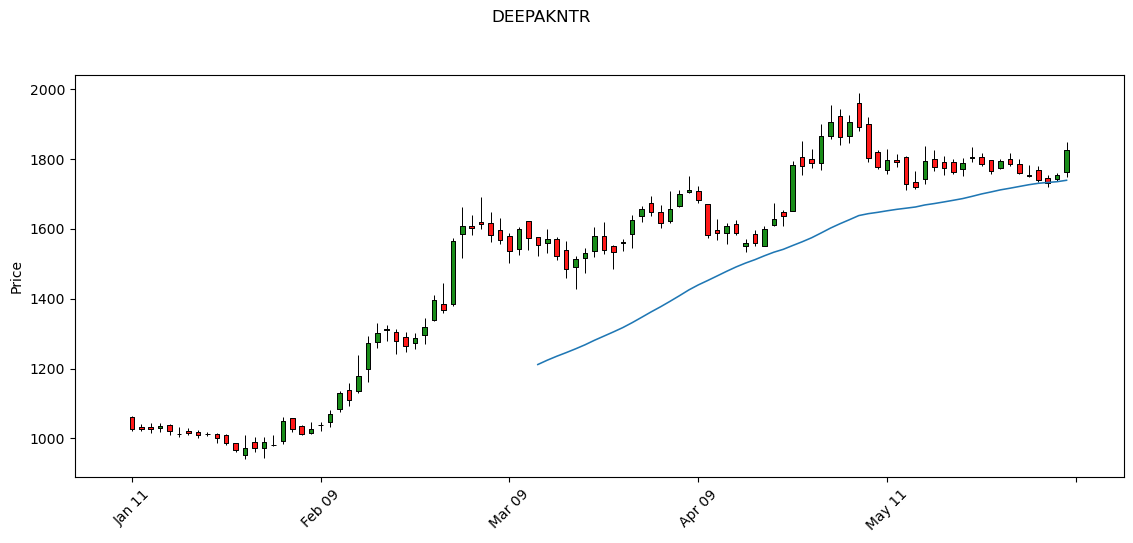

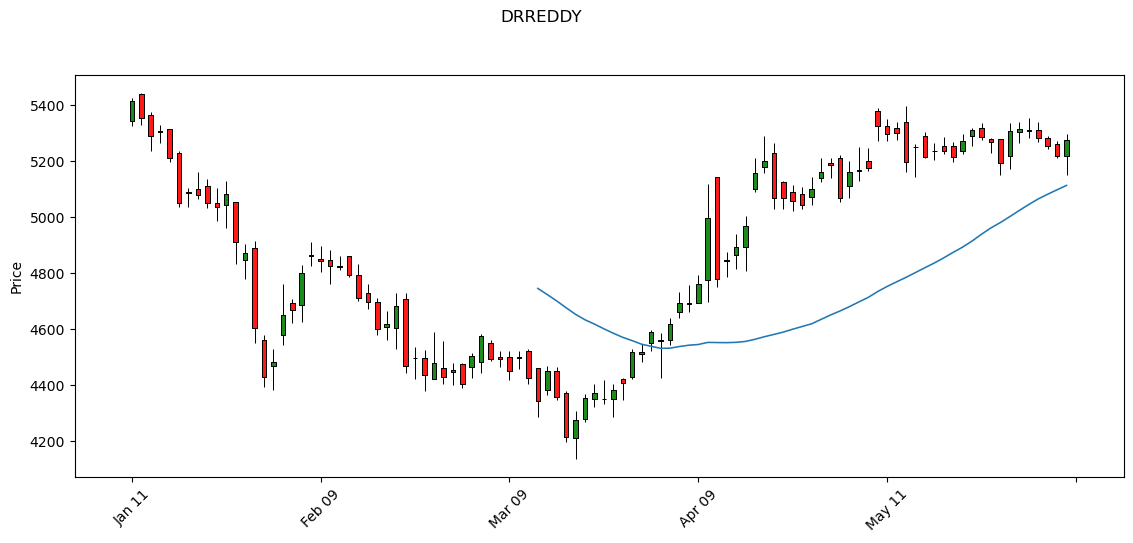

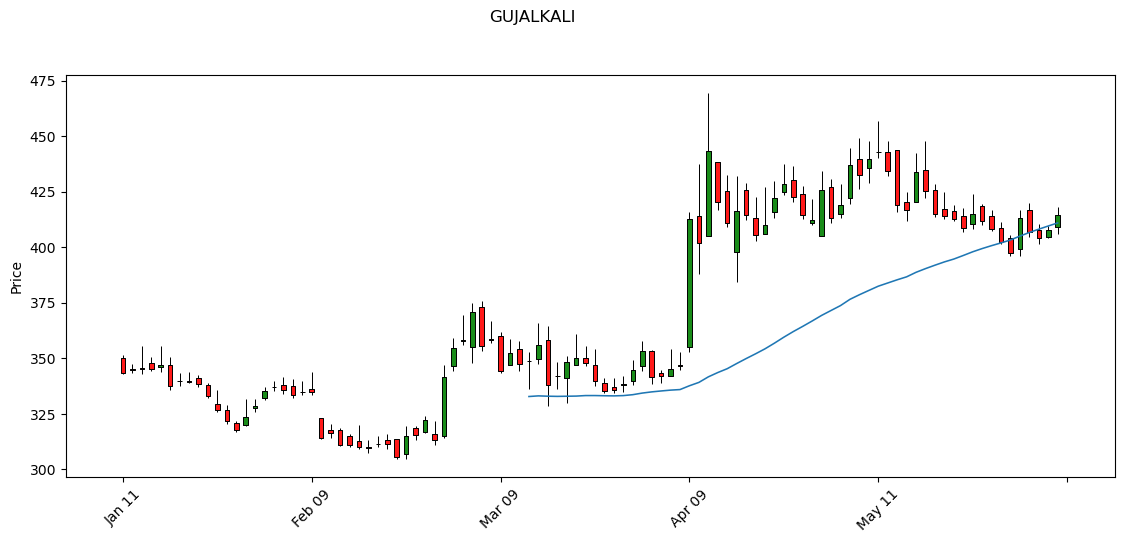

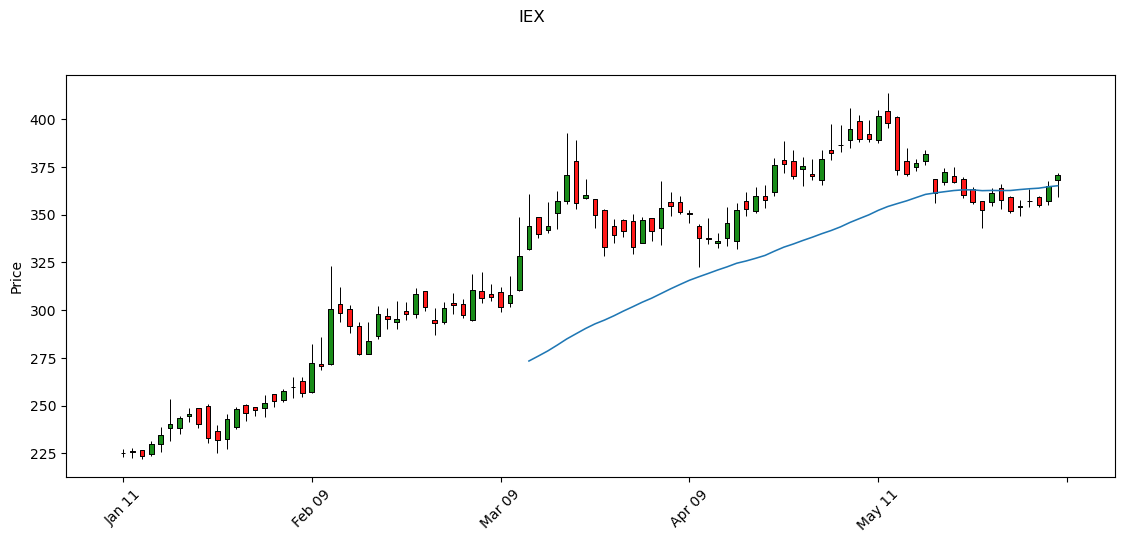

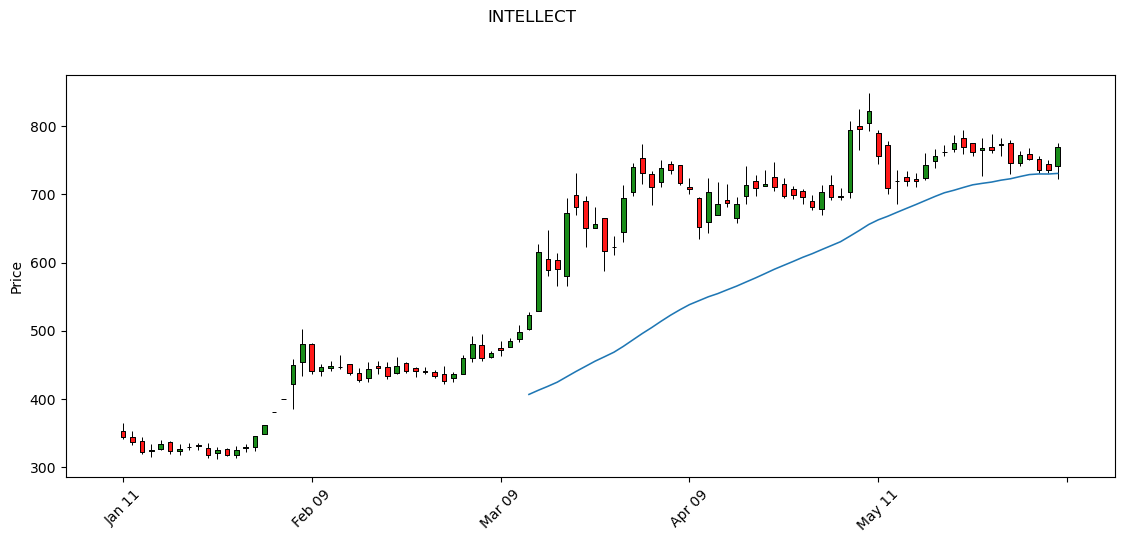

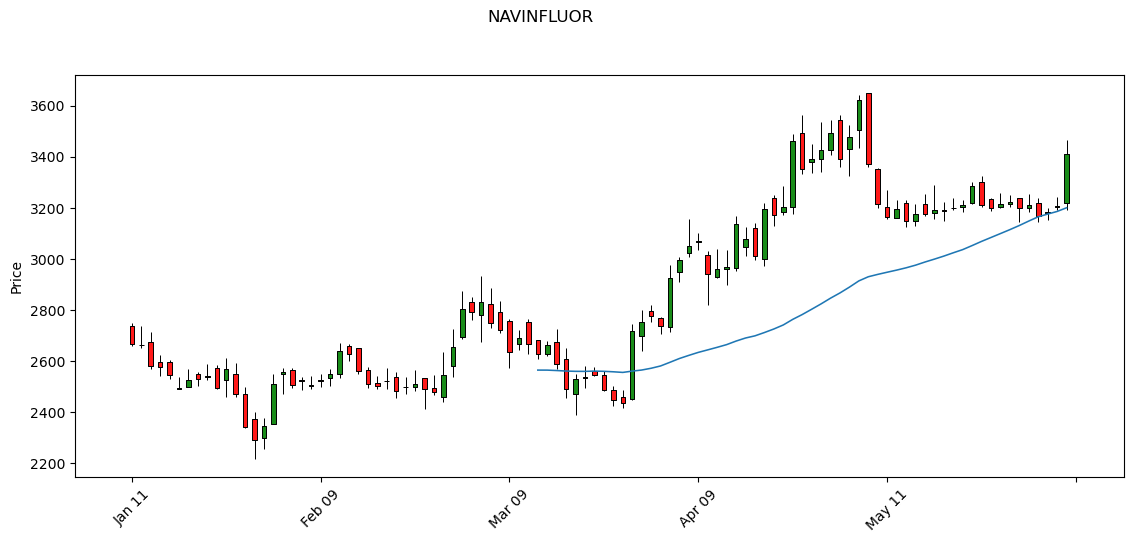

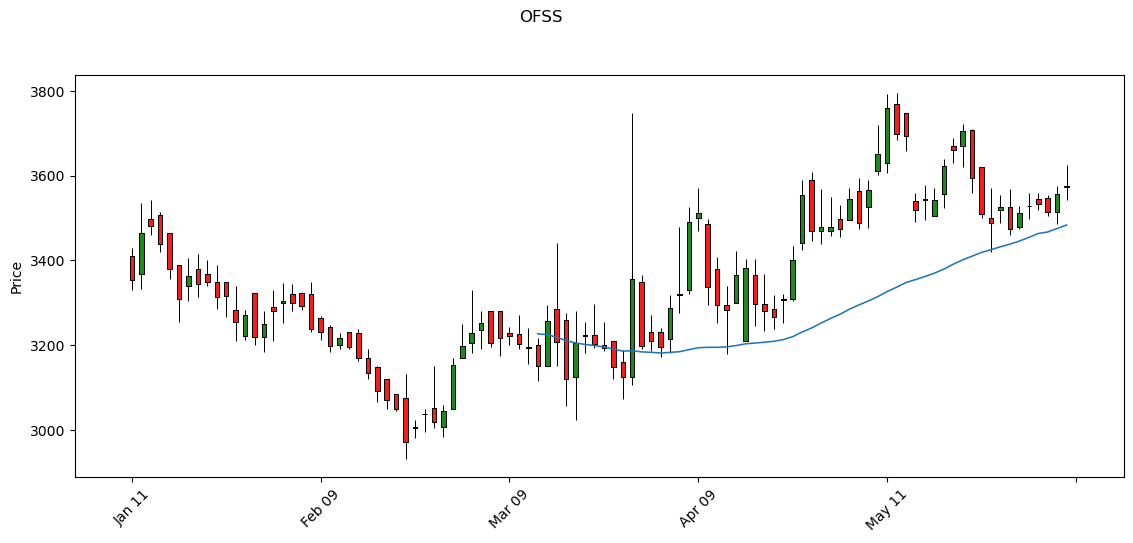

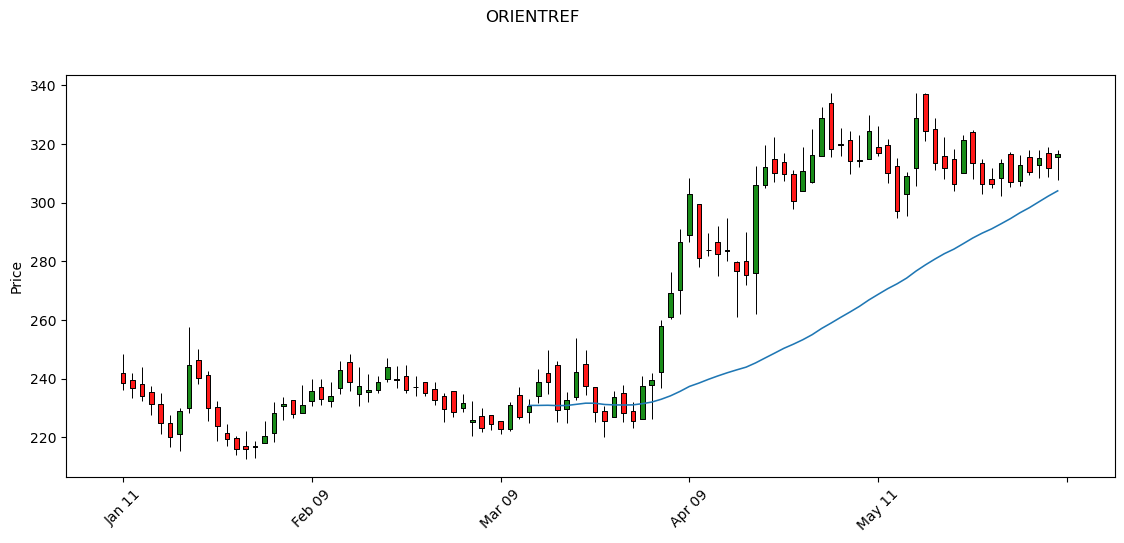

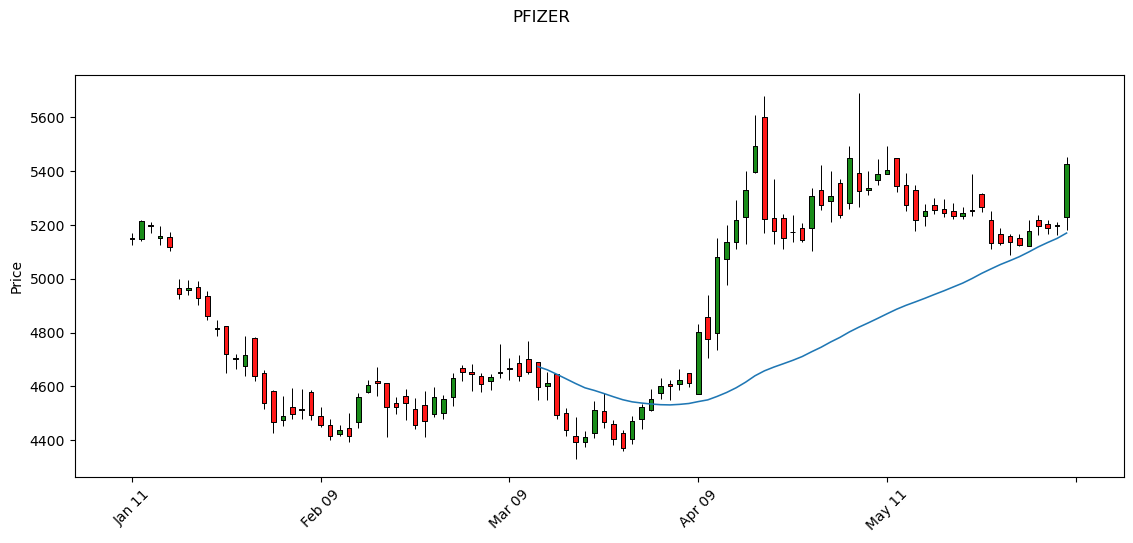

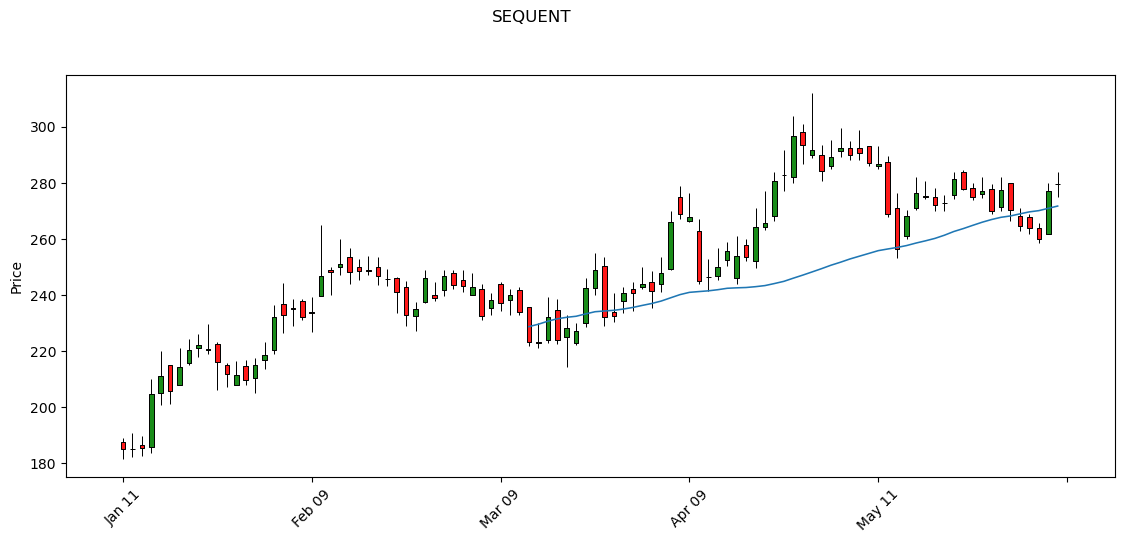

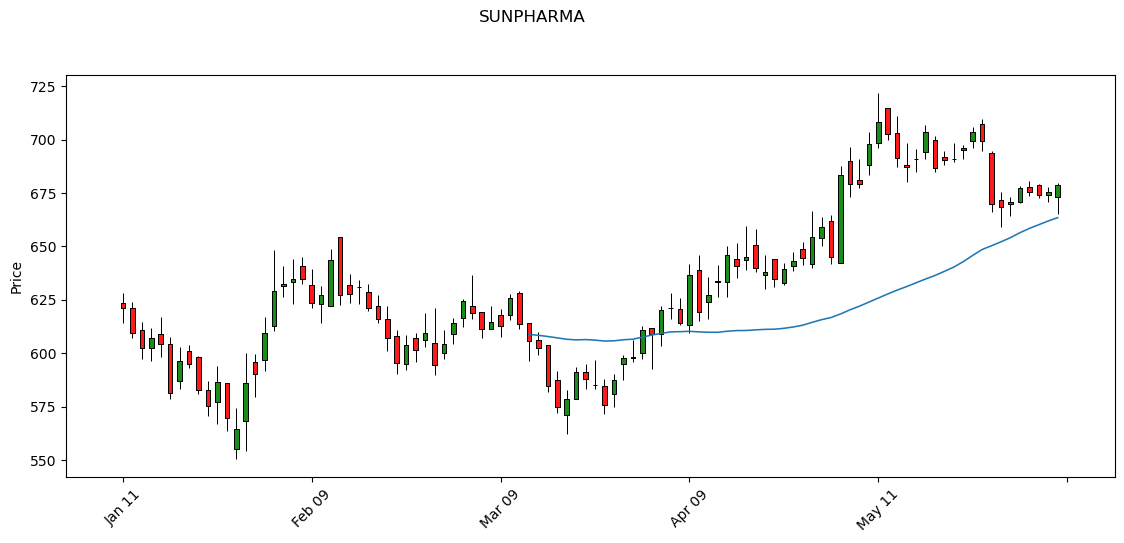

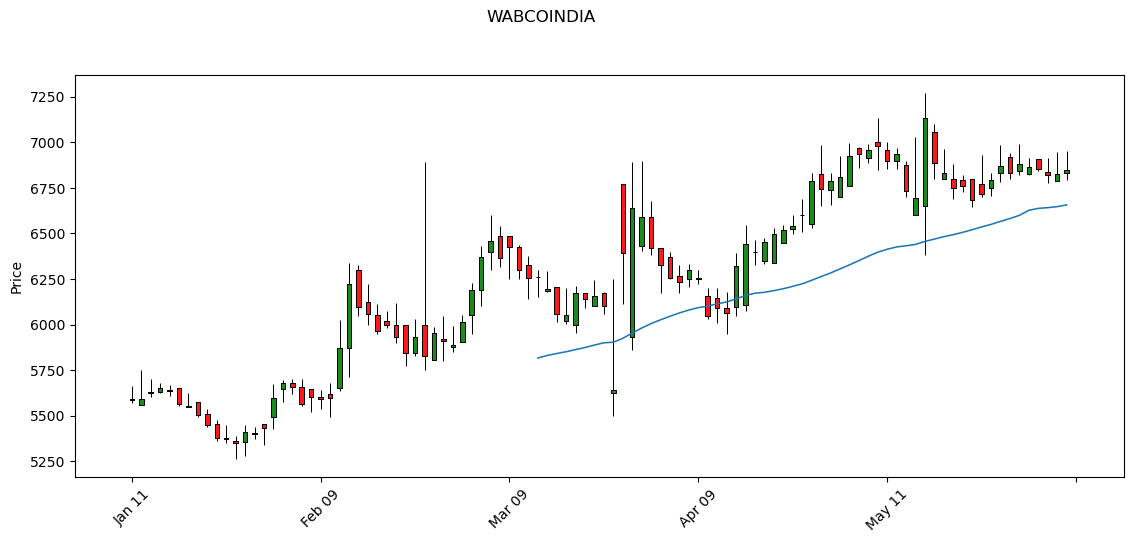

In [66]:
list=[]
for index, row in nifty.iterrows():
    symbol=row["Symbol"]
    #rising_stock=get_history(symbol,start=datetime(2021,1,1),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
    rising_stock=pd.read_csv(f'stocks/{symbol}.csv',index_col=0,parse_dates=True)
    if rising_stock.shape[0]> 1:
        open=rising_stock['Open'][-1]
        close=rising_stock['Close'][-1]
        if open< close :
            SMA_window = 44
            rising_stock["44_obs_for_SMA"] = rising_stock["Close"].rolling(window=SMA_window).mean()

            sma_last=rising_stock["44_obs_for_SMA"][-1]
            sma_5=rising_stock["44_obs_for_SMA"][-5]
            sma_11=rising_stock["44_obs_for_SMA"][-11]
            sma_16=rising_stock["44_obs_for_SMA"][-16]
            sma_22=rising_stock["44_obs_for_SMA"][-22]
            sma_33=rising_stock["44_obs_for_SMA"][-33]
            sma_44=rising_stock["44_obs_for_SMA"][-44]
            high=rising_stock["High"][-1]
            low=rising_stock["Low"][-1]
            price=close*(2/100)
            if sma_44<sma_33 and sma_33<sma_22 and sma_22<sma_16 and sma_16<sma_11 and sma_11<sma_5 and sma_5<sma_last and sma_11<sma_last and sma_16<sma_last and sma_22<sma_last:
                if (high>= sma_last and low<= sma_last) or (abs(low-sma_last)<=price and low>=sma_last):
                    sublist=[]
                    sublist.append(symbol)
                    list.append(sublist)
                    #rising_stock.reset_index('Date',inplace=True)
                    #rising_stock['Date'] = pd.to_datetime(rising_stock.Date)
                    #rising_stock.set_index('Date',inplace=True)
                    #print(symbol)
                    #df["pivots"]=np.nan
                    mpf.plot(rising_stock,type='candle',title=f'{symbol}',figratio=(38,15),mav=44,style=s)
                

In [63]:
data=pd.DataFrame(list,columns=["Symbol"])
data.to_csv("stocks/rising_stocks.csv")

In [8]:
data=pd.DataFrame(list,columns=["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"])
data=data[["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"]]
data.to_csv("stocks/rising_stocks.csv")

In [64]:
rising_stocks=pd.read_csv('stocks/rising_stocks.csv',index_col=0)

In [33]:
#rising_stocks.columns

In [32]:
#rising_stocks

# Get stocks which make hammer pattern

In [21]:
for index,row in nifty.iterrows():
    symbol=row["Symbol"]
    df=pd.read_csv(f'stocks/{symbol}.csv',index_col=0, parse_dates=True)
    
    if df.shape[0]> 1:
        open=df['Open'][-1]
        close=df['Close'][-1]
           
        high=df['High'][-1]
        low=df['Low'][-1]
        top=high-close
        bottom=open-low
        body=close-open
        if top<=body and 2*body< bottom:
            mpf.plot(df,type='candle',title = f"{symbol}",figratio=(38,15),mav=44,style=s)
        
    
    

# Get stocks whick is falling 

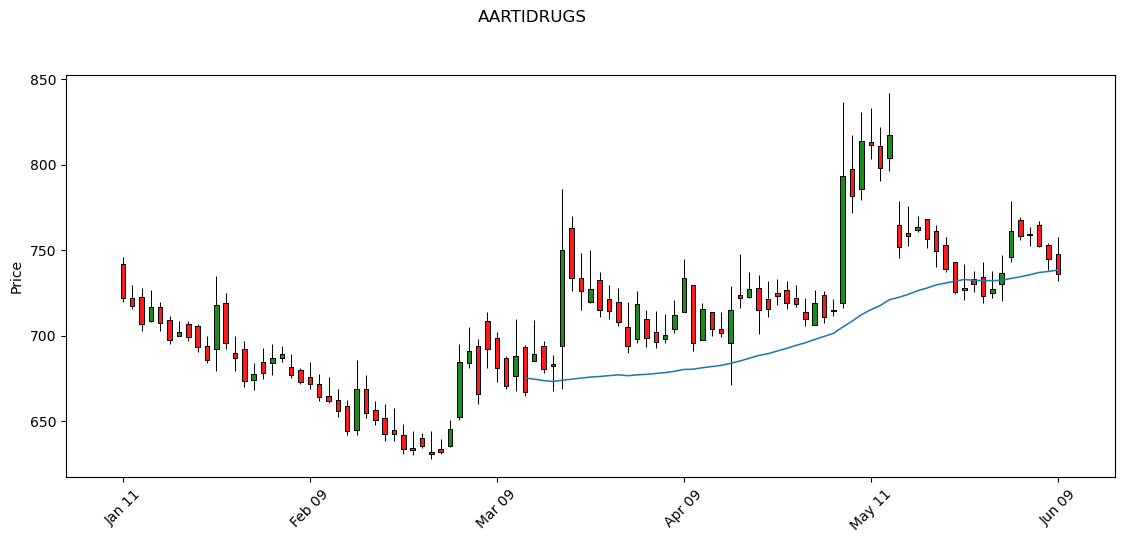

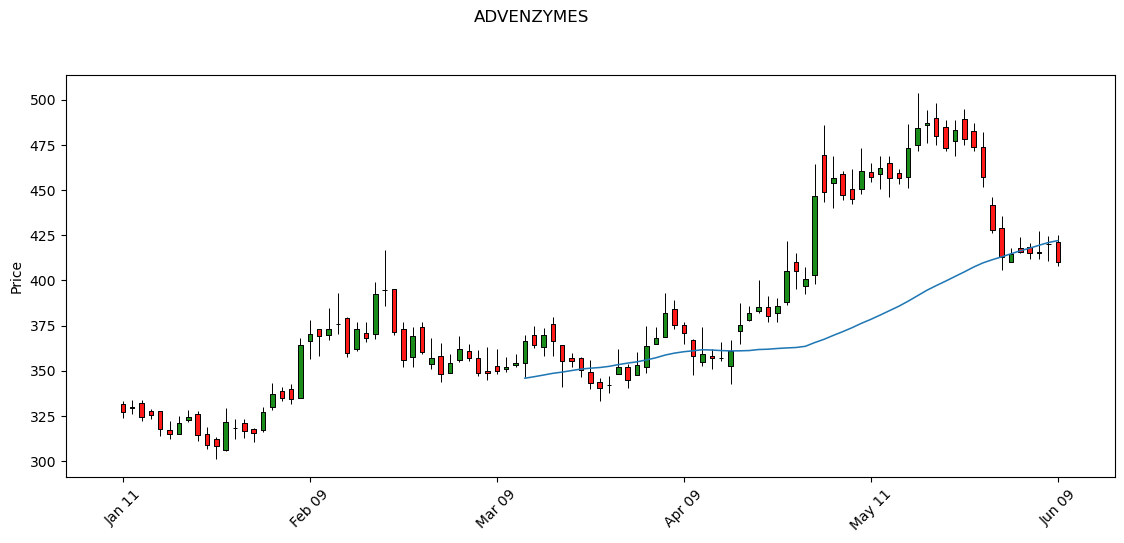

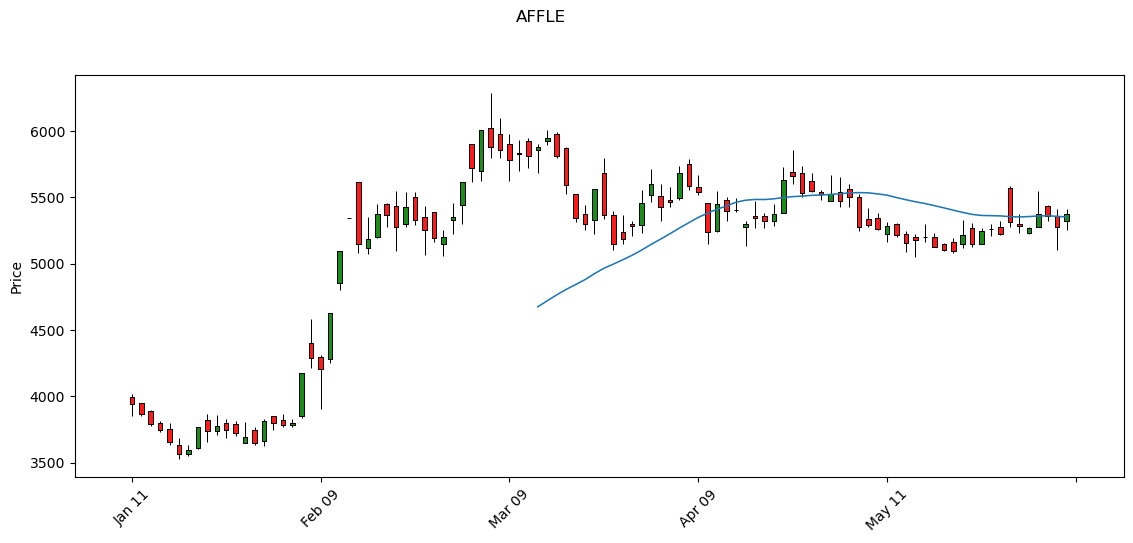

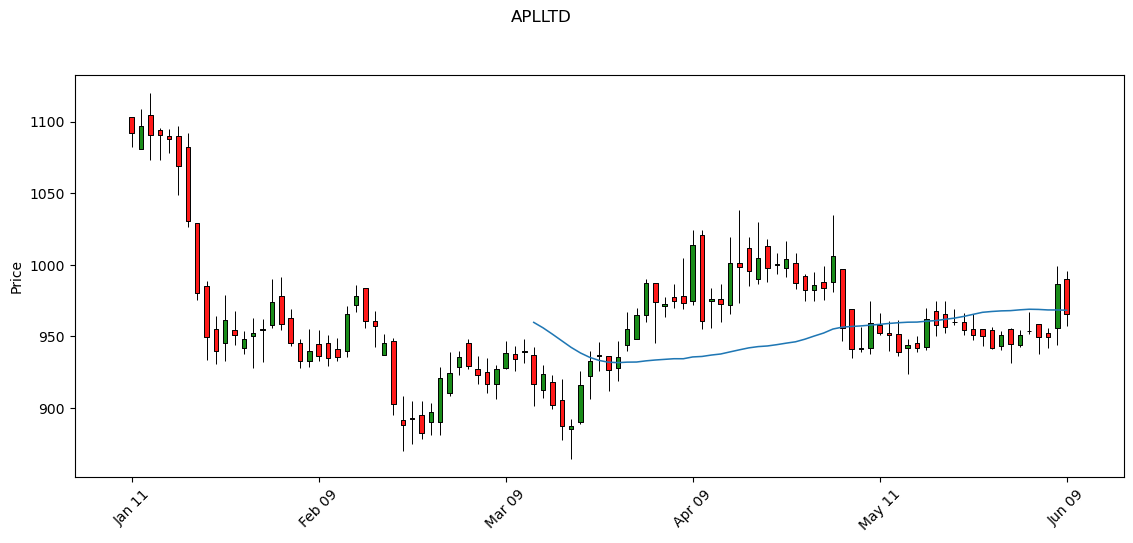

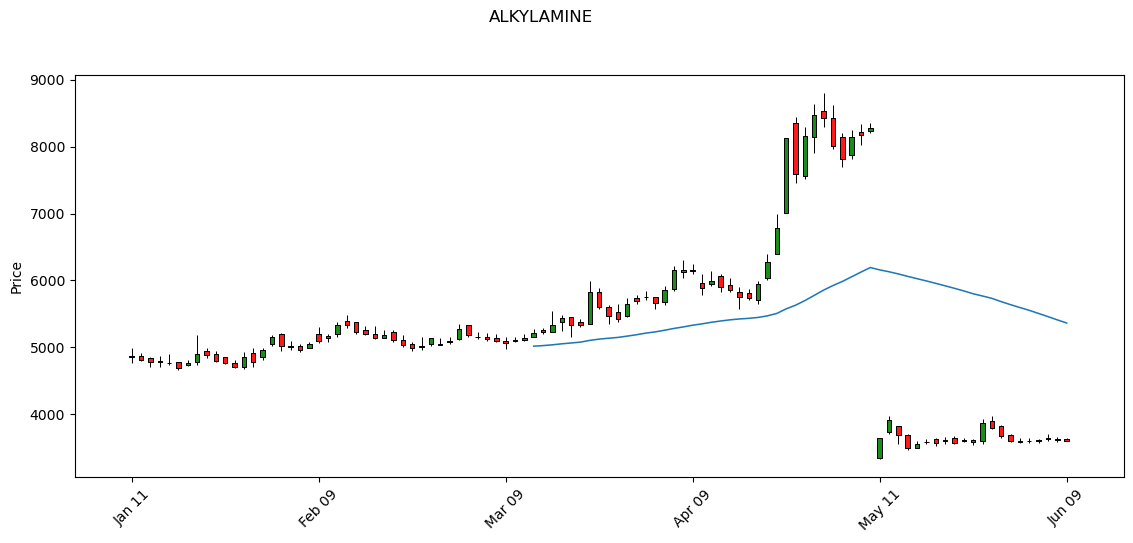

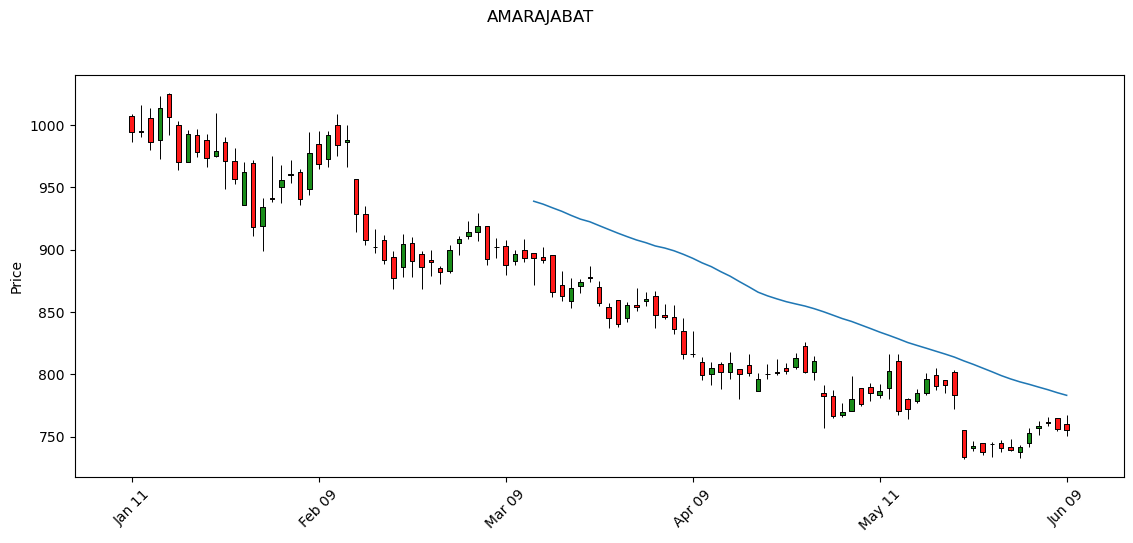

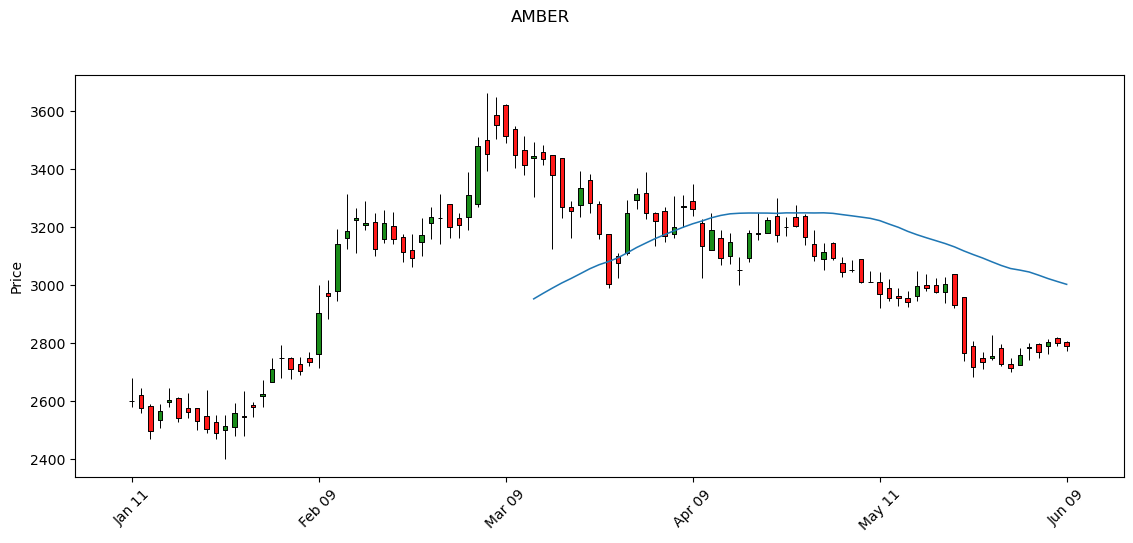

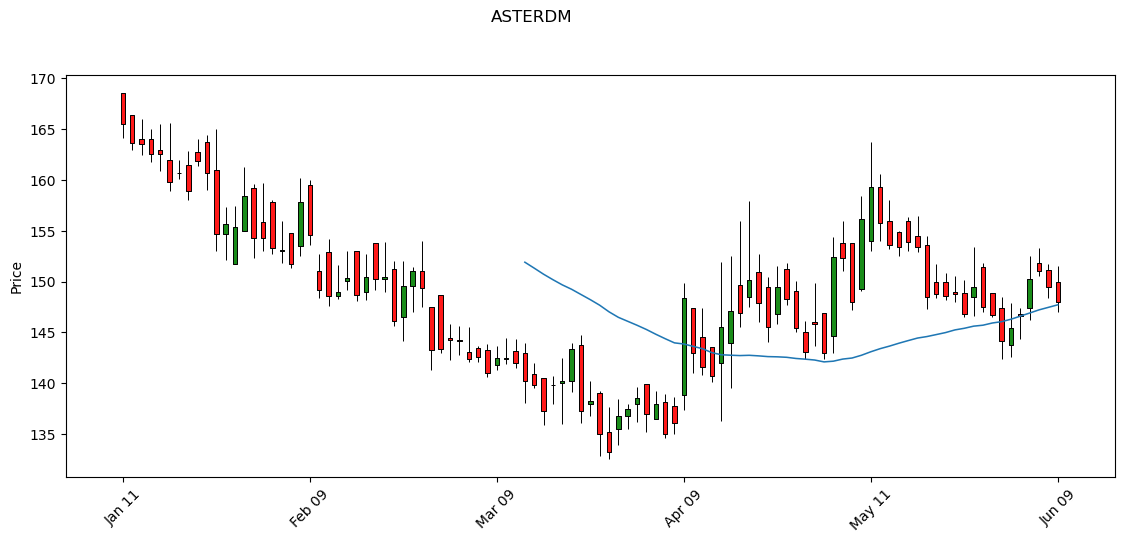

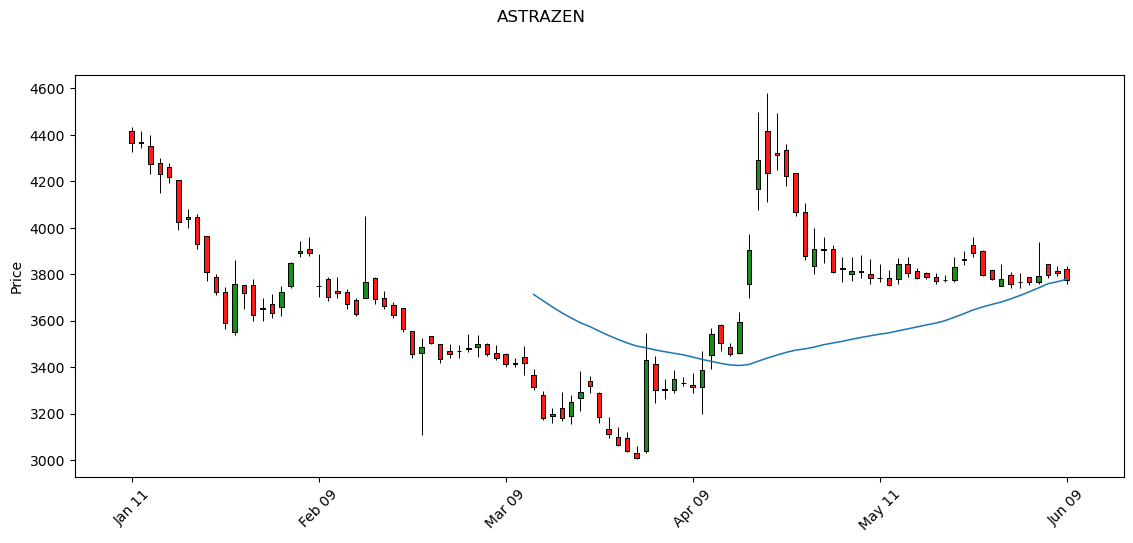

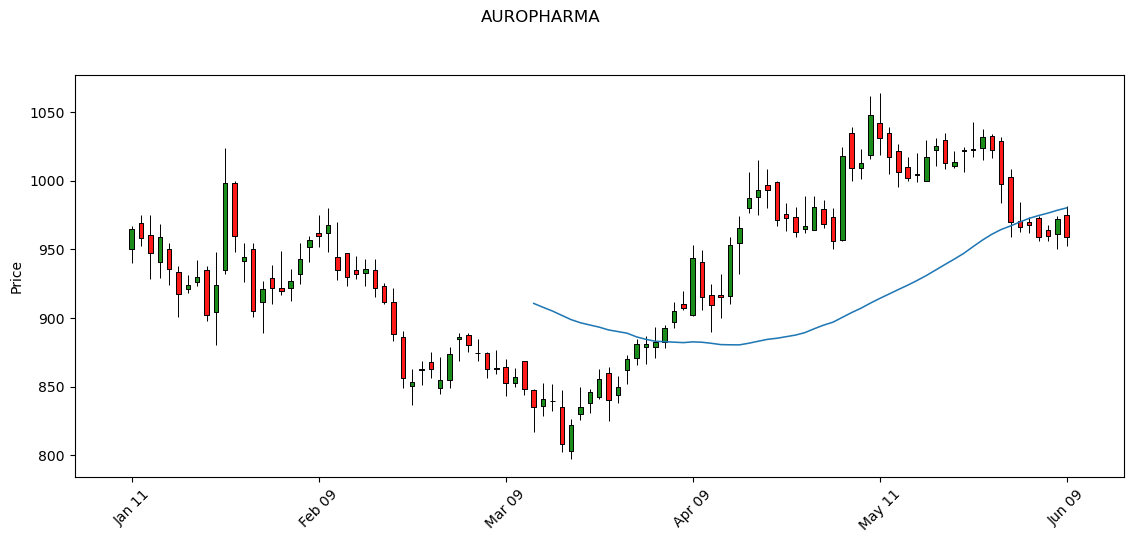

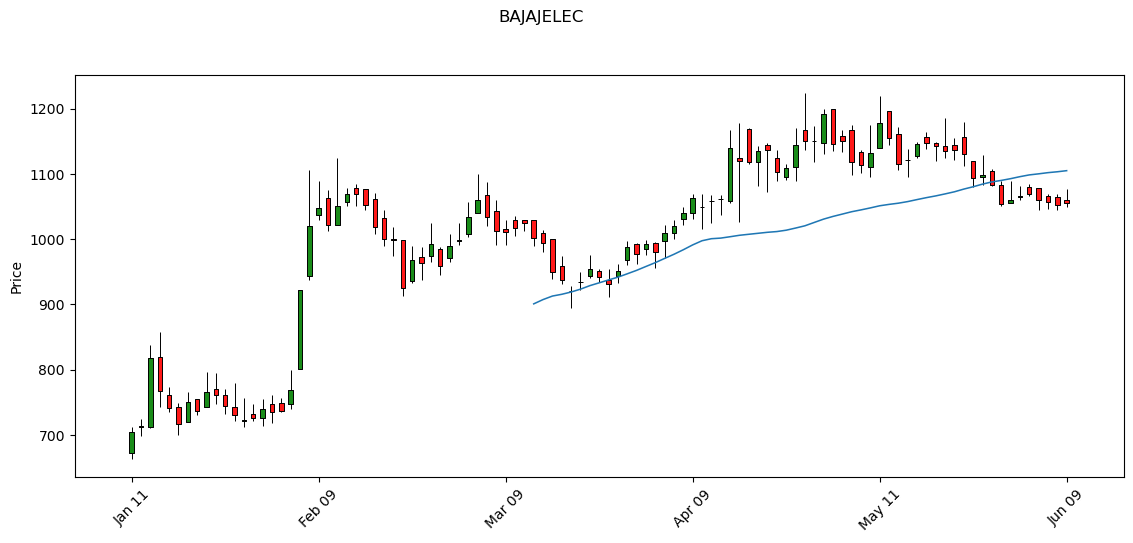

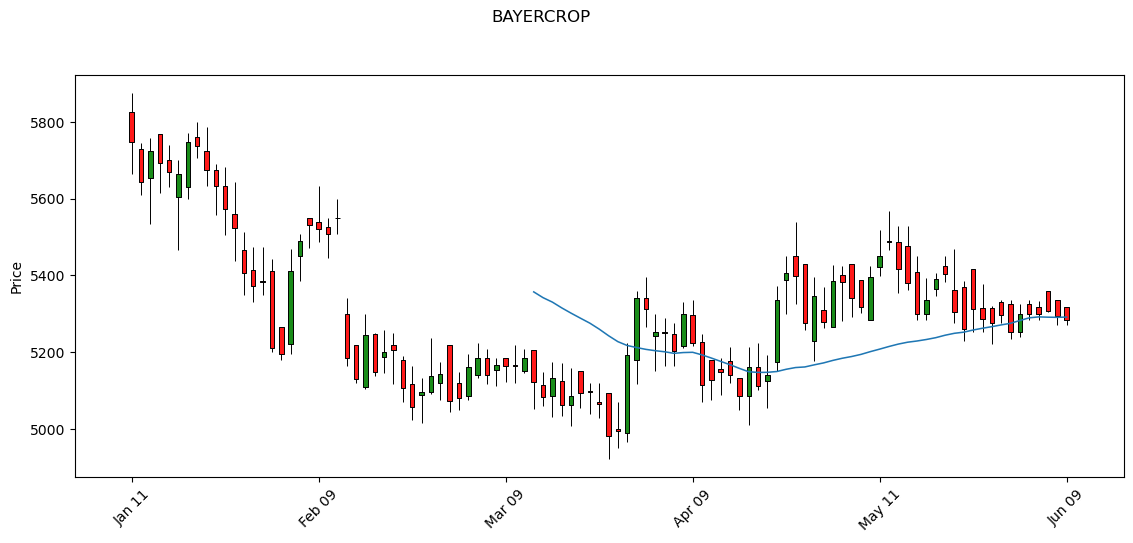

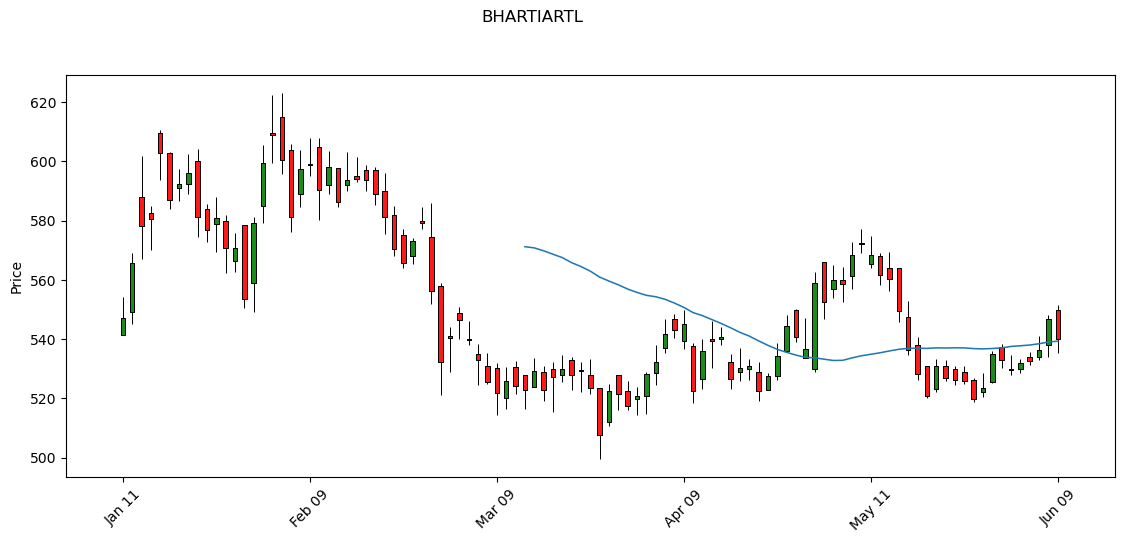

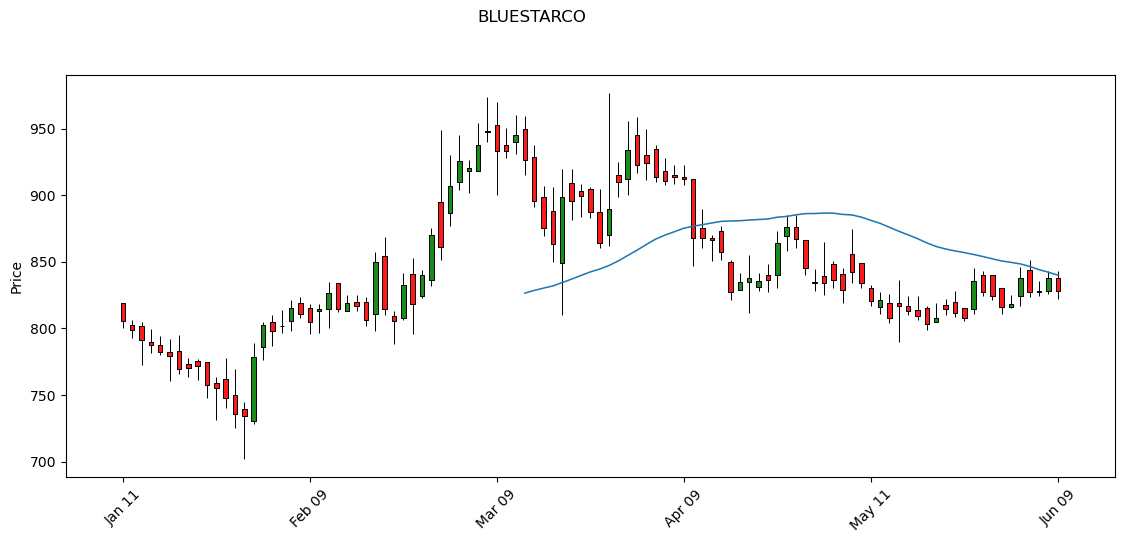

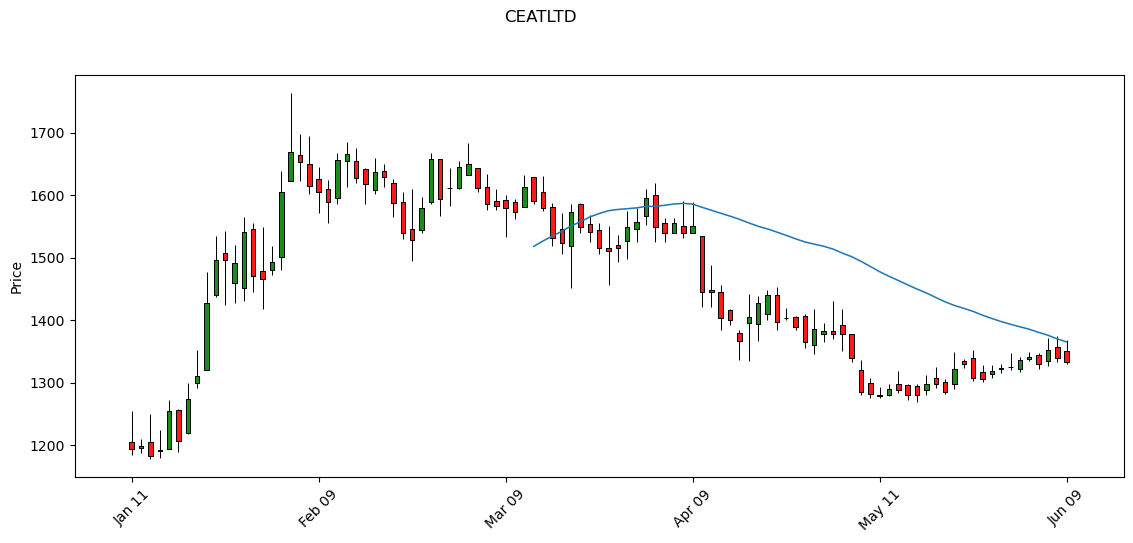

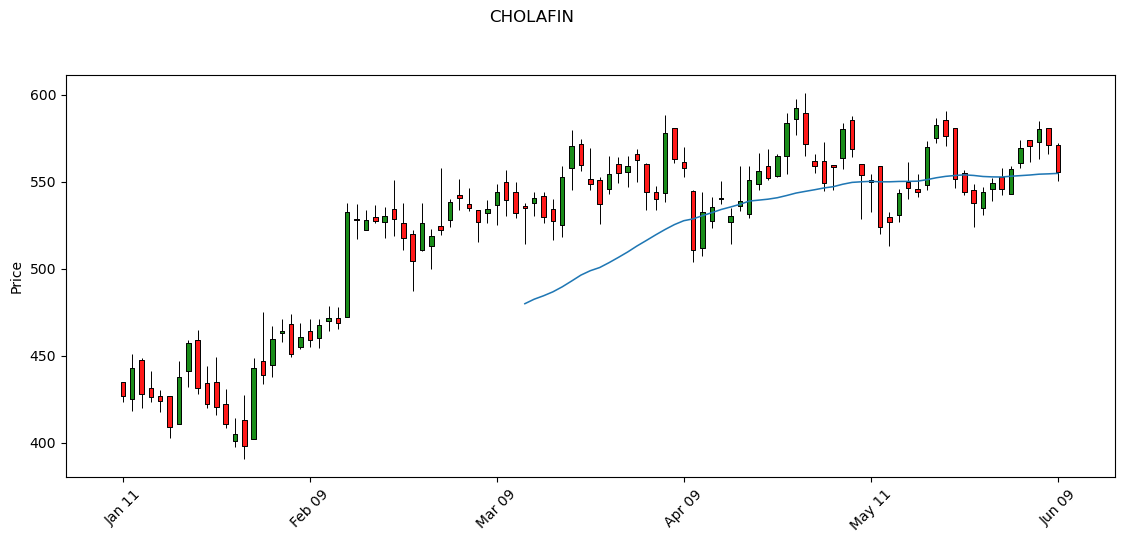

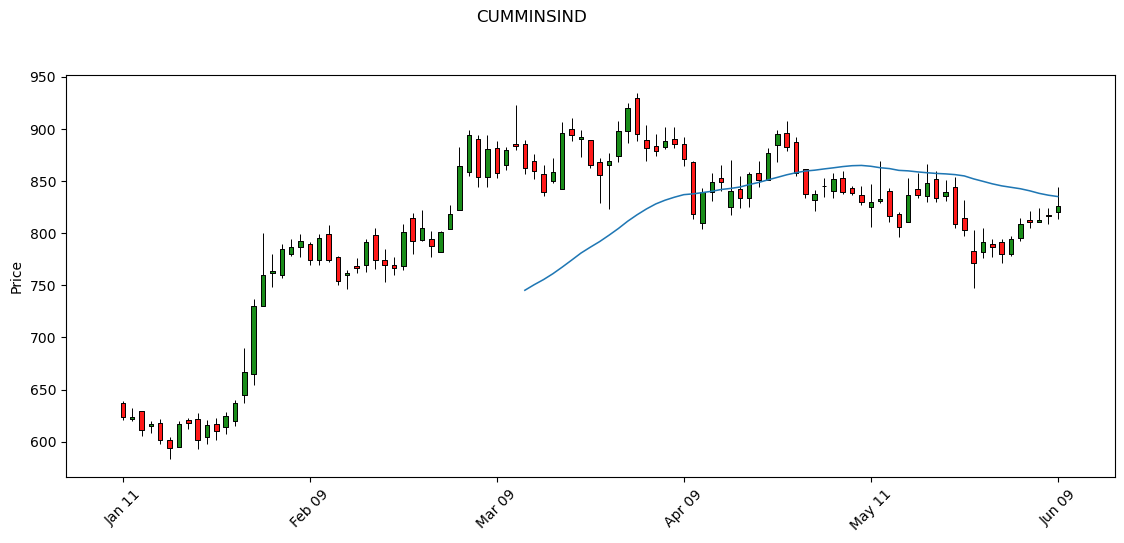

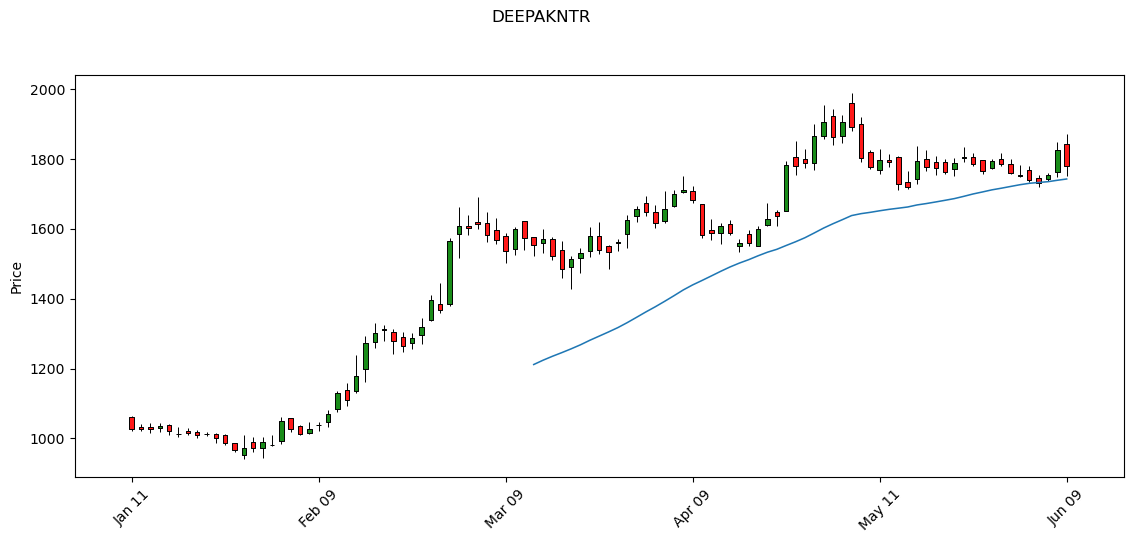

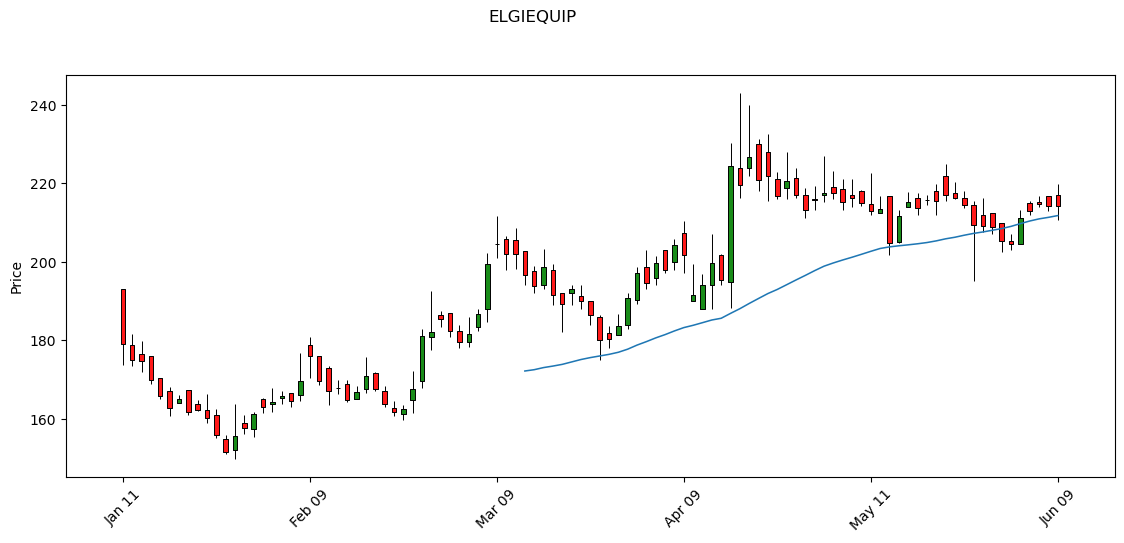

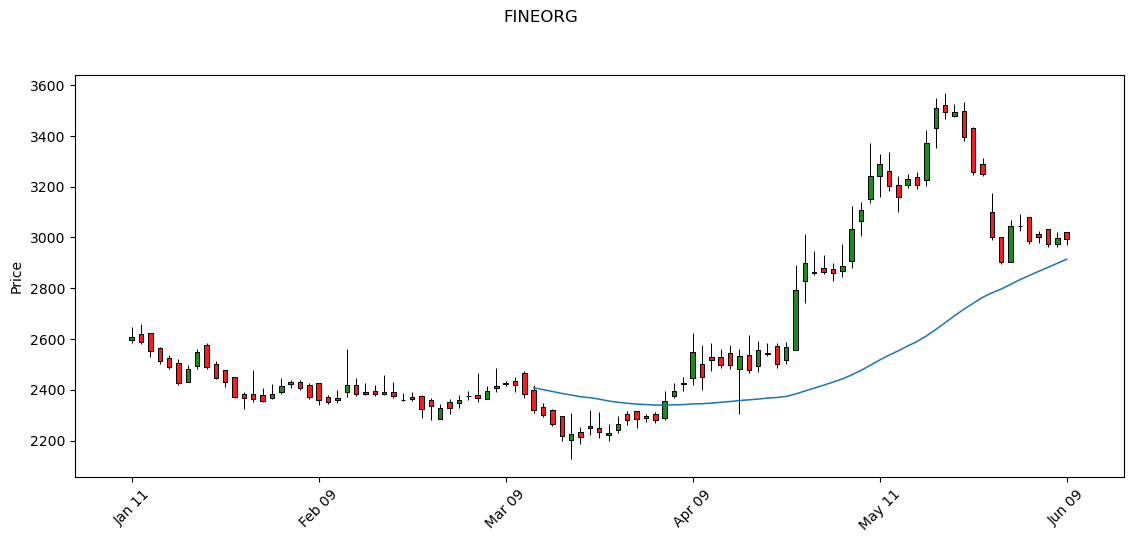

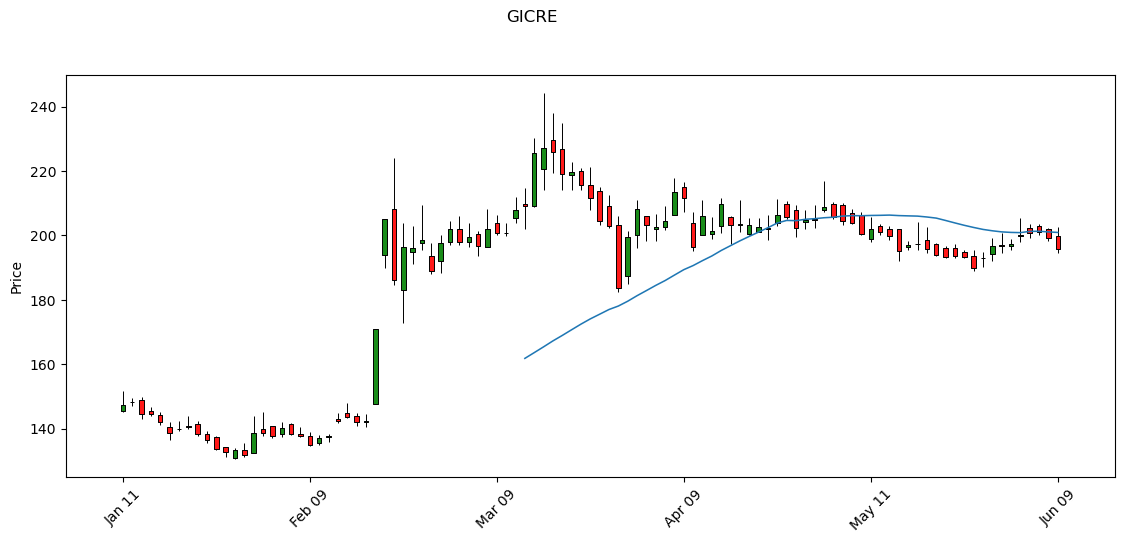

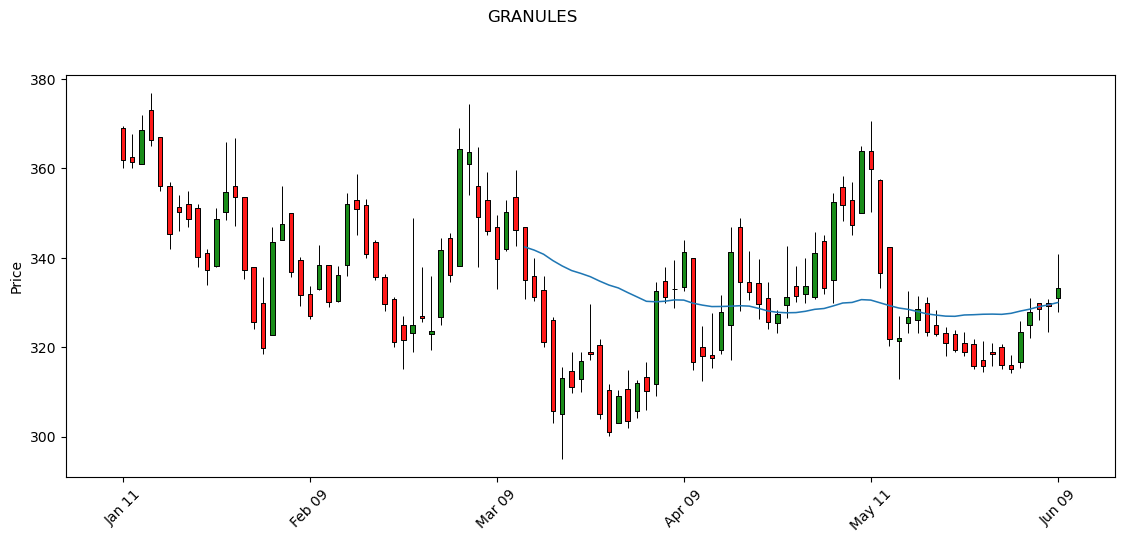

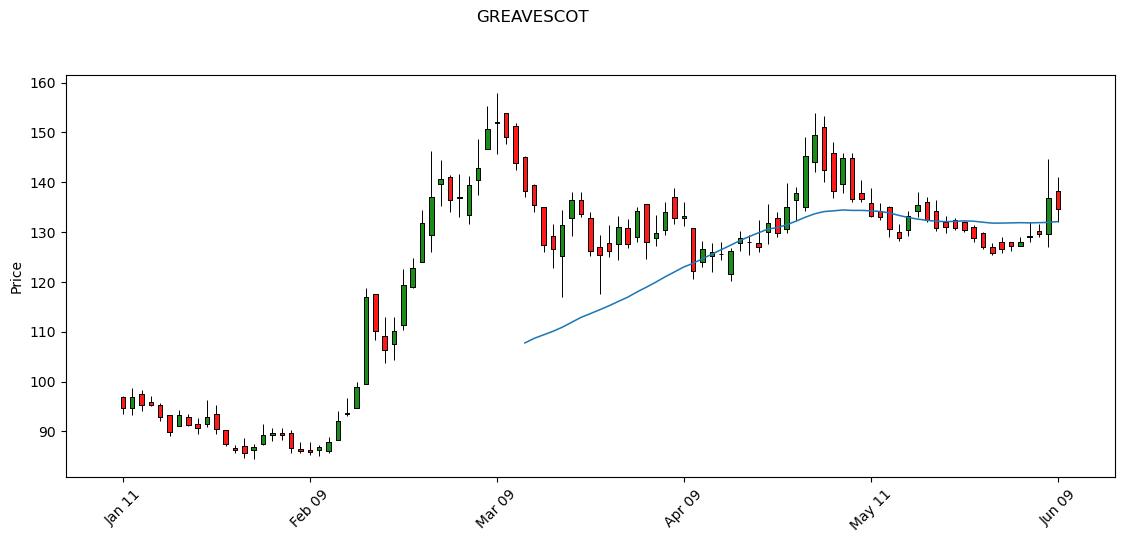

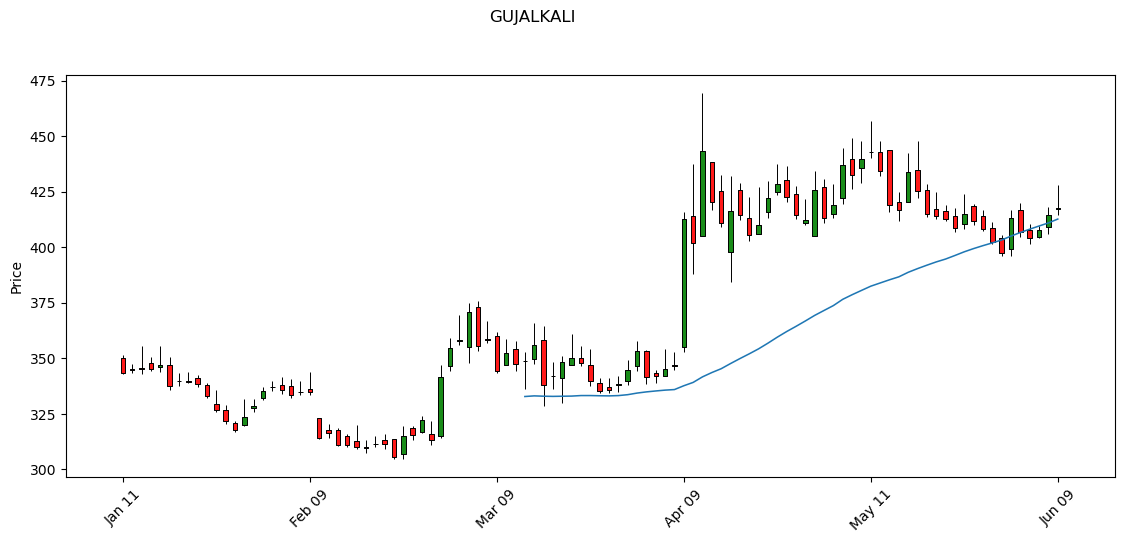

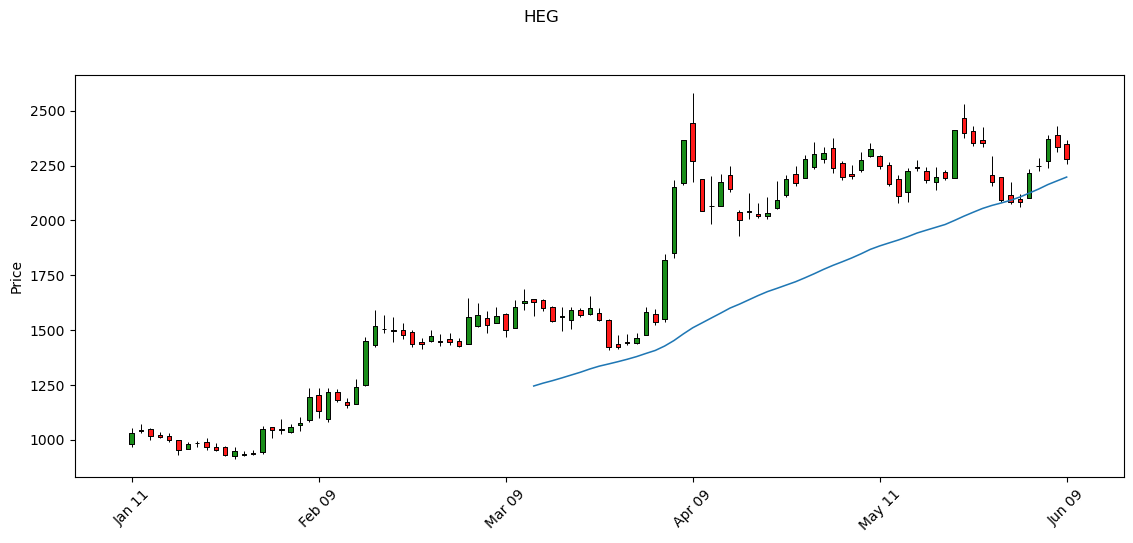

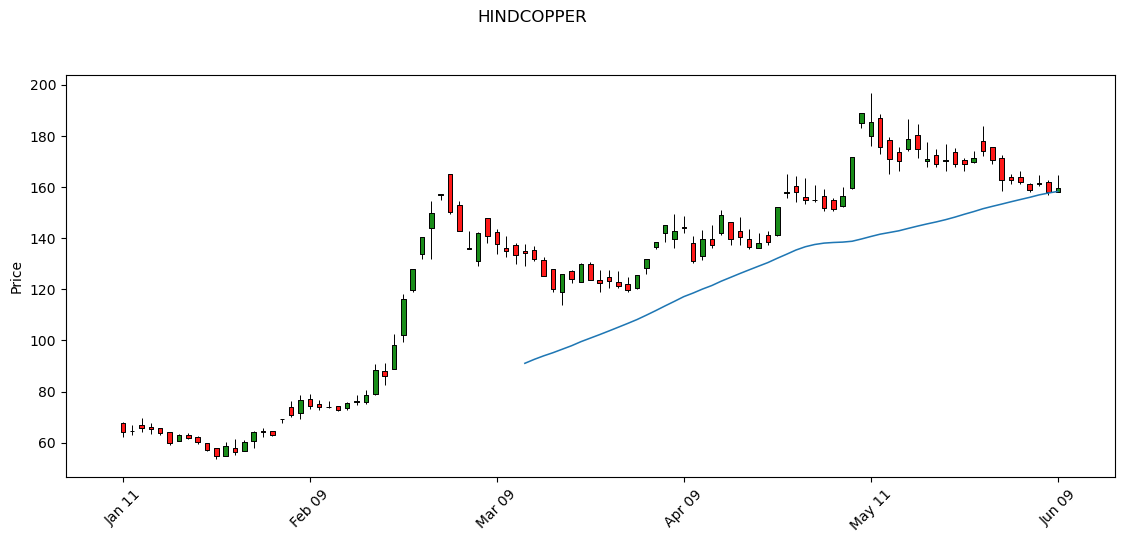

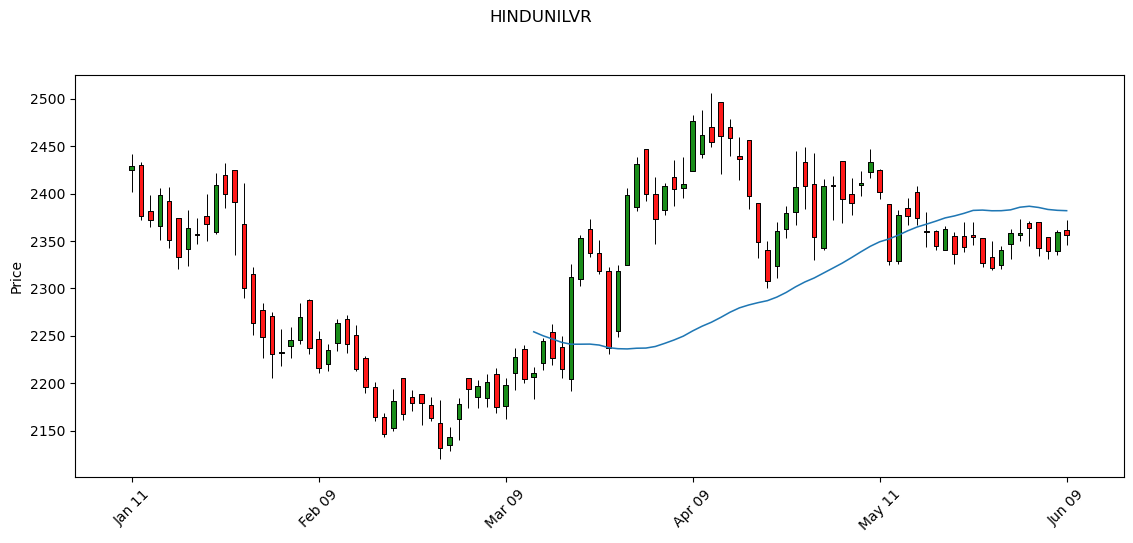

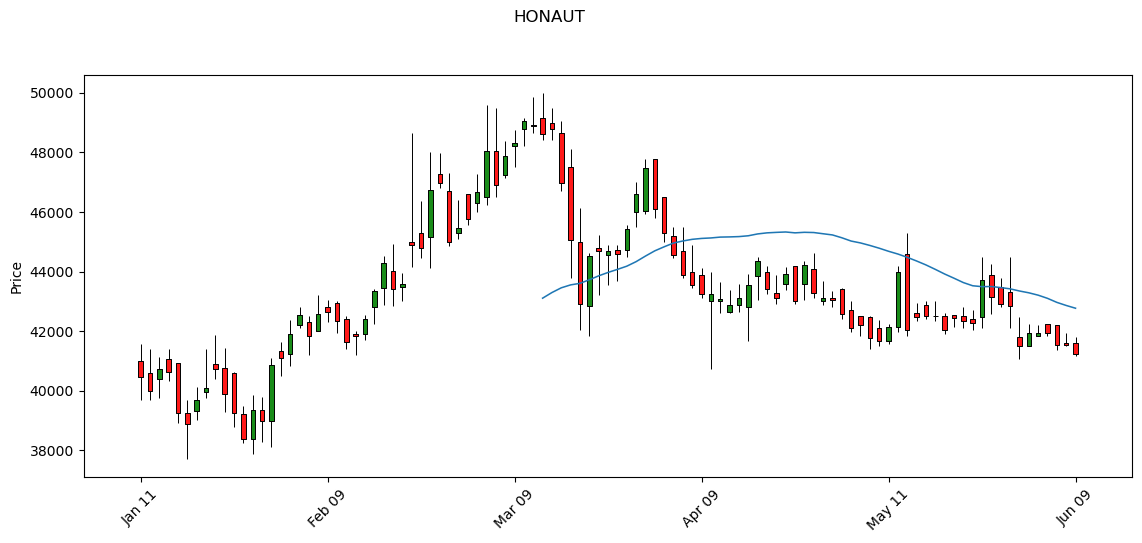

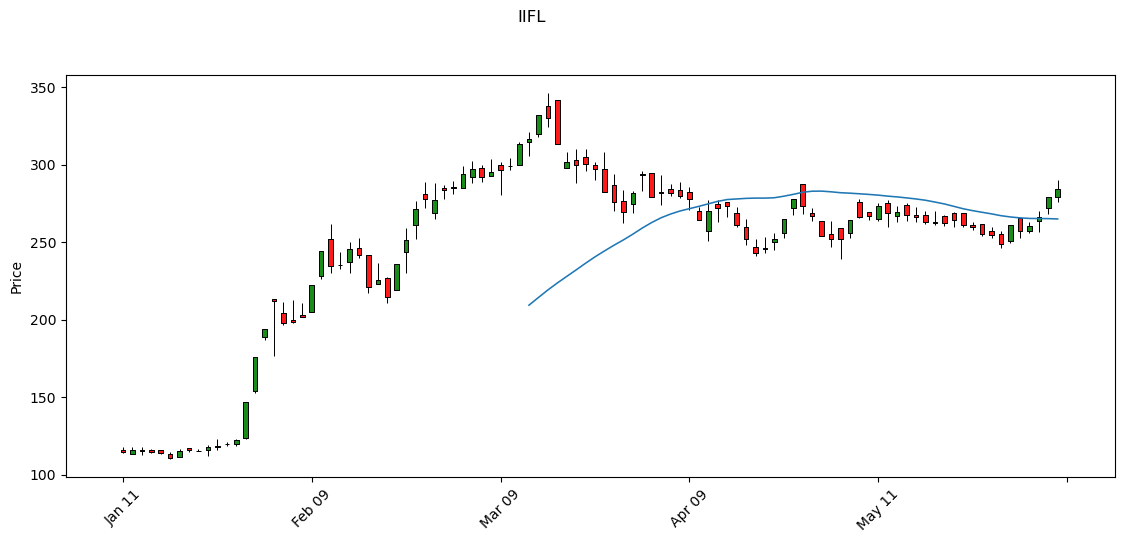

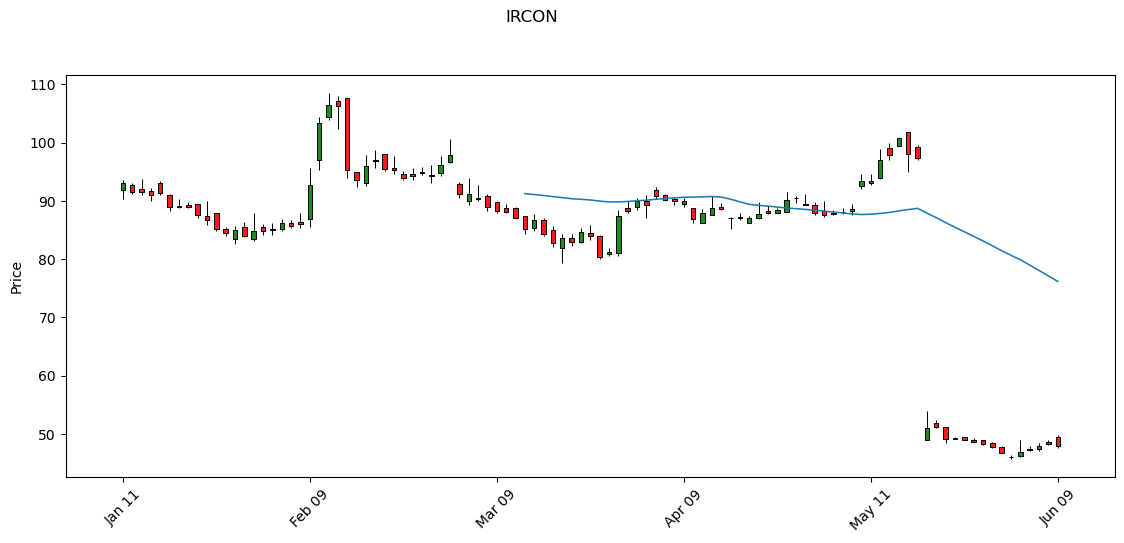

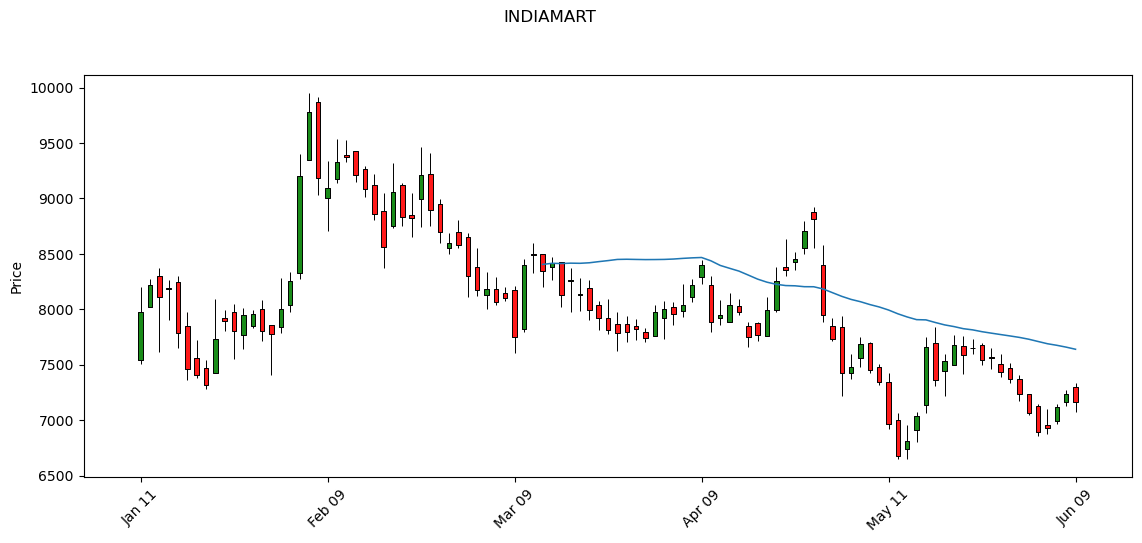

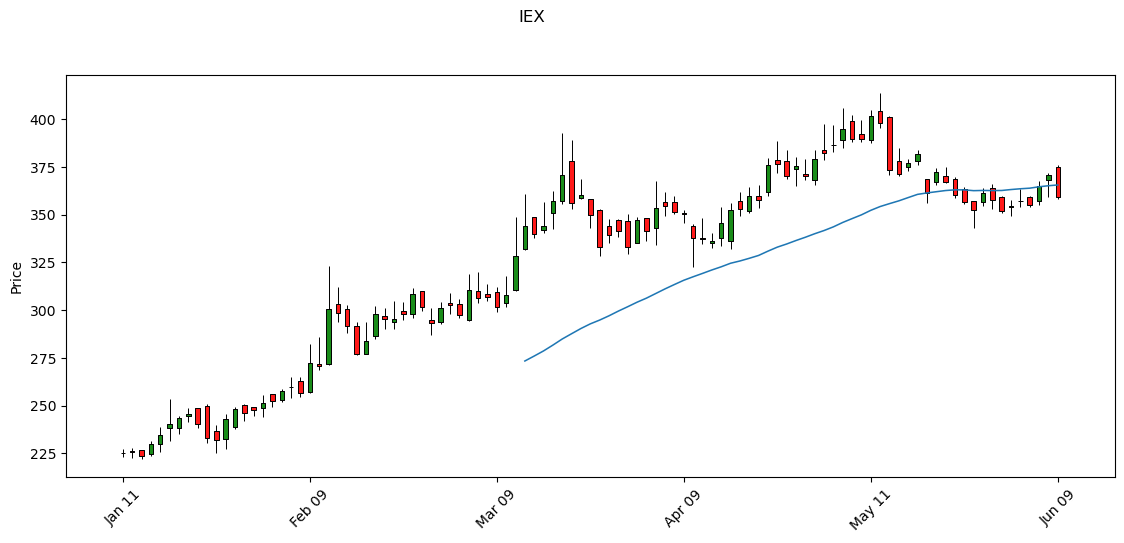

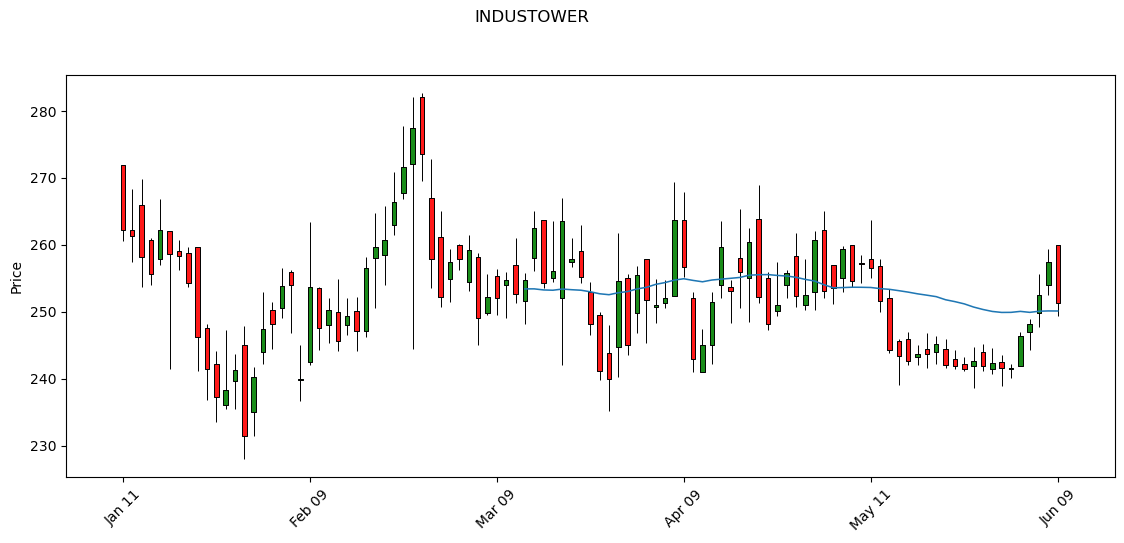

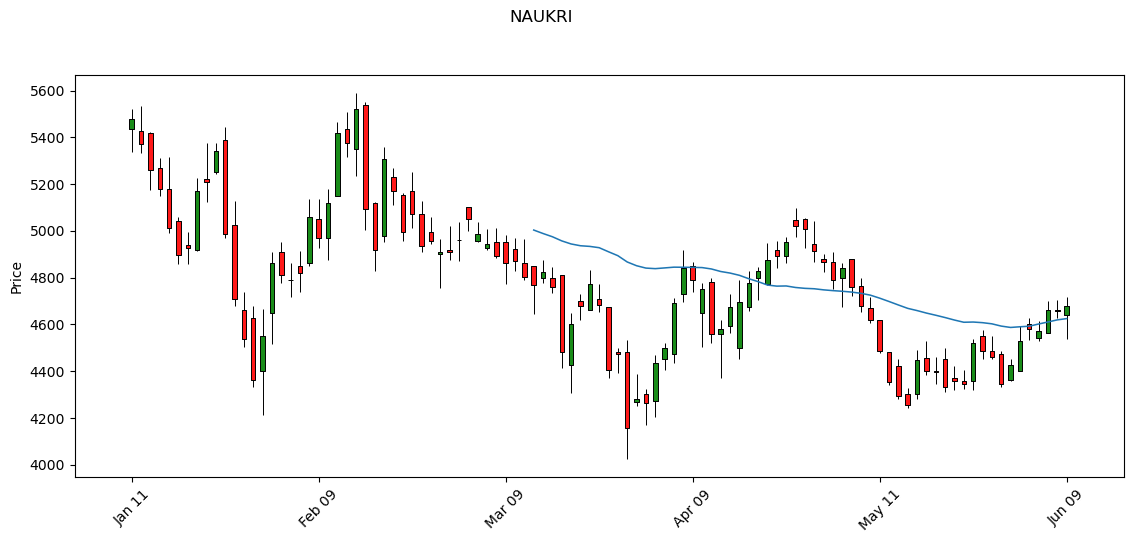

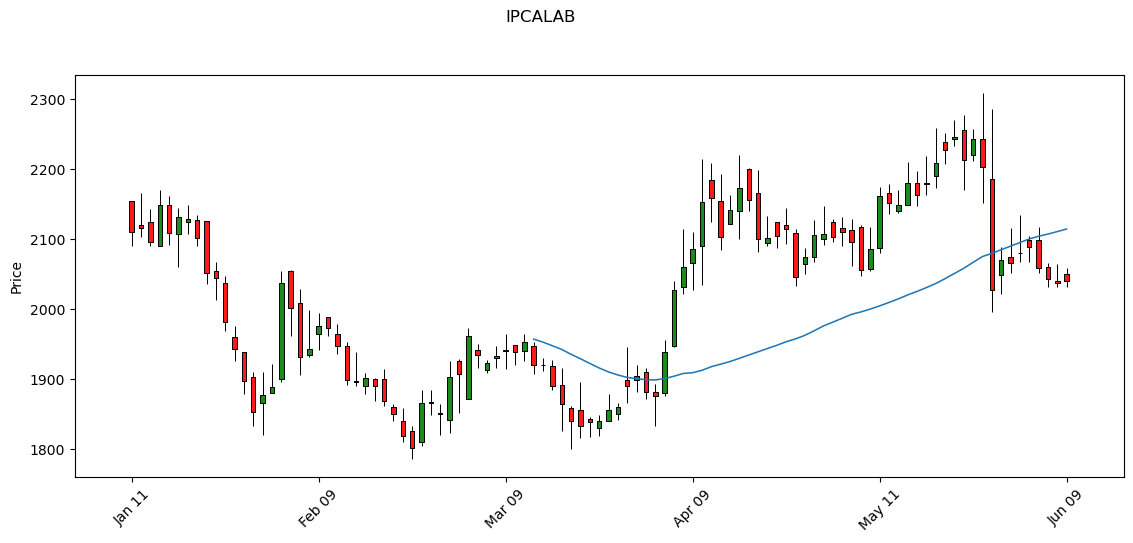

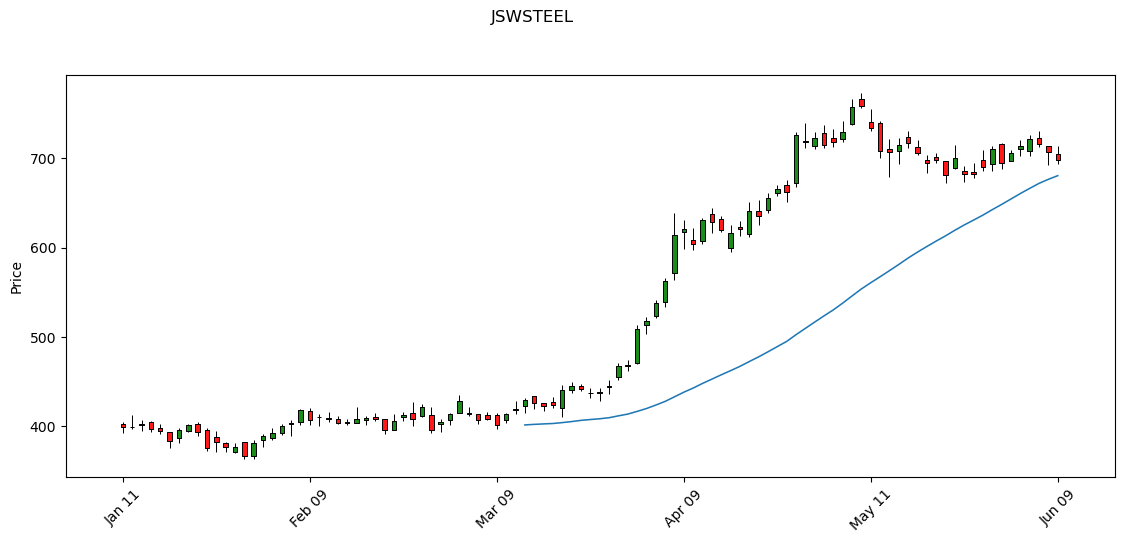

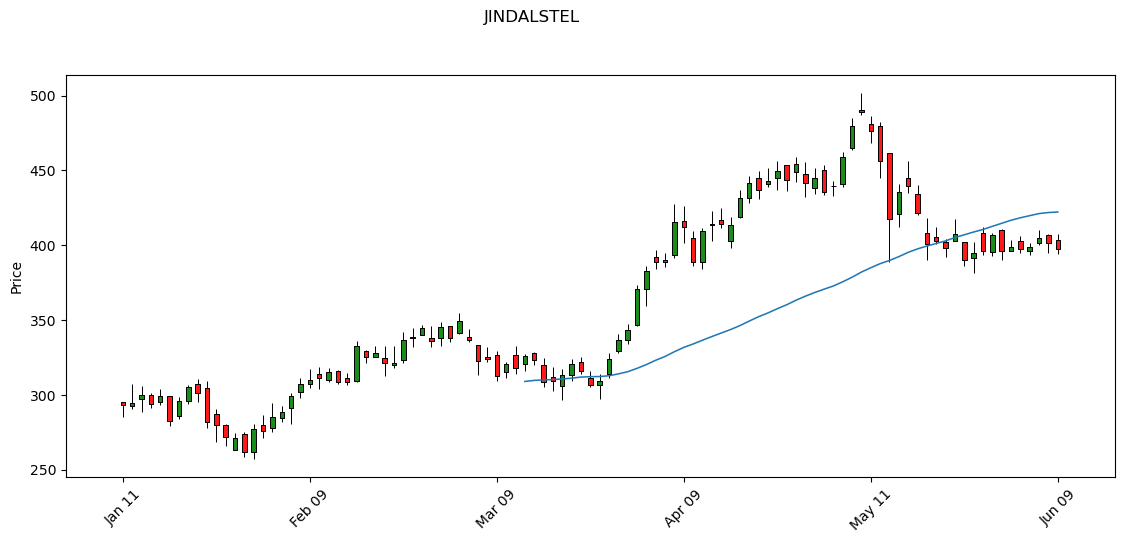

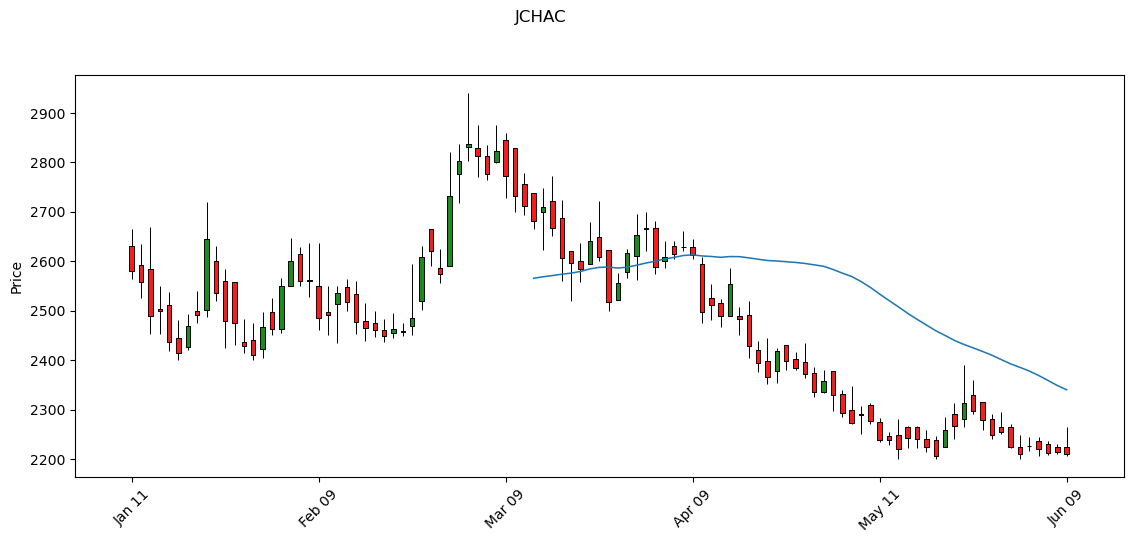

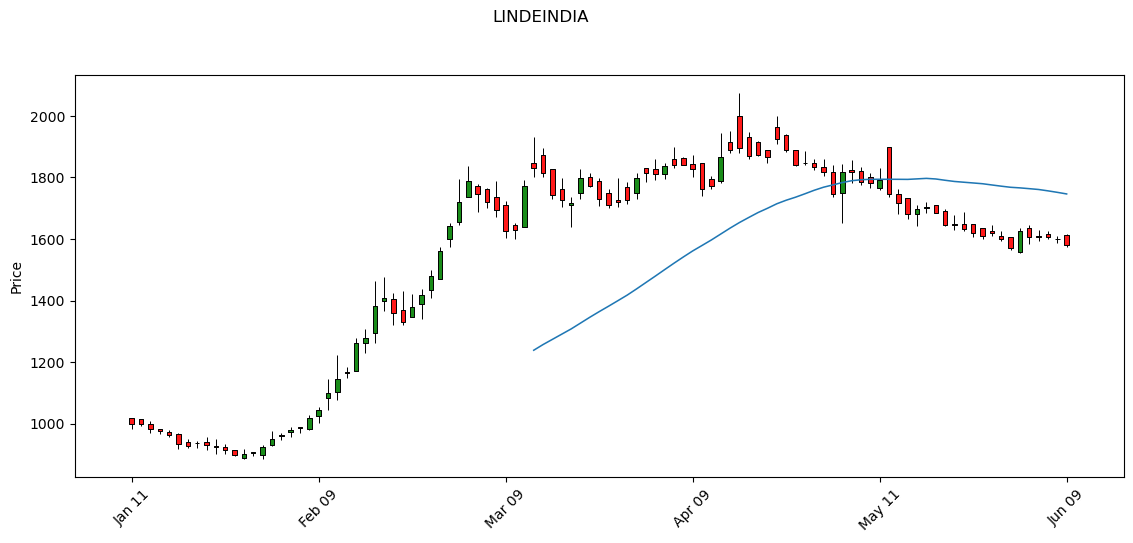

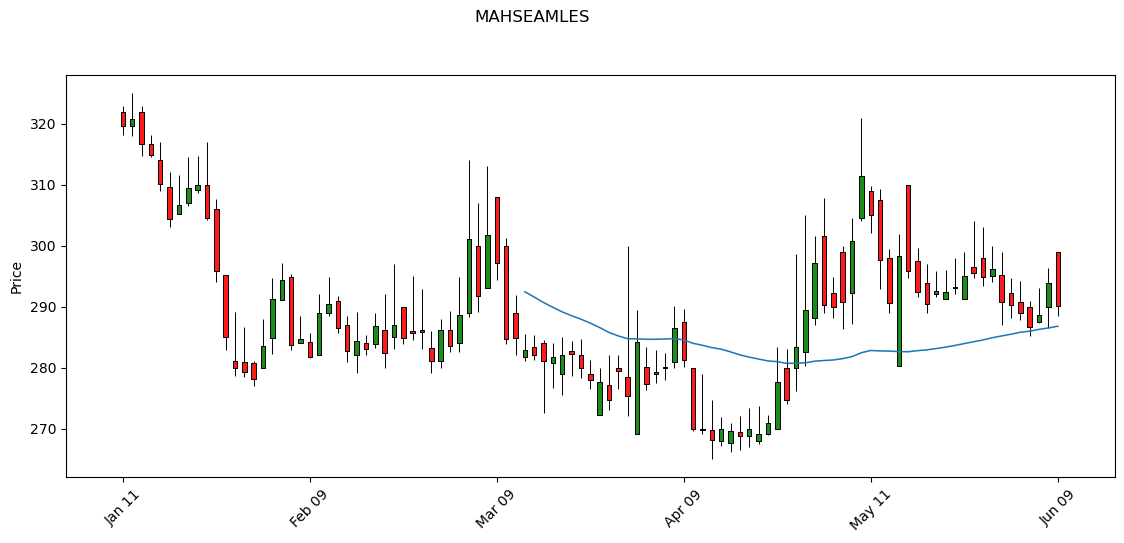

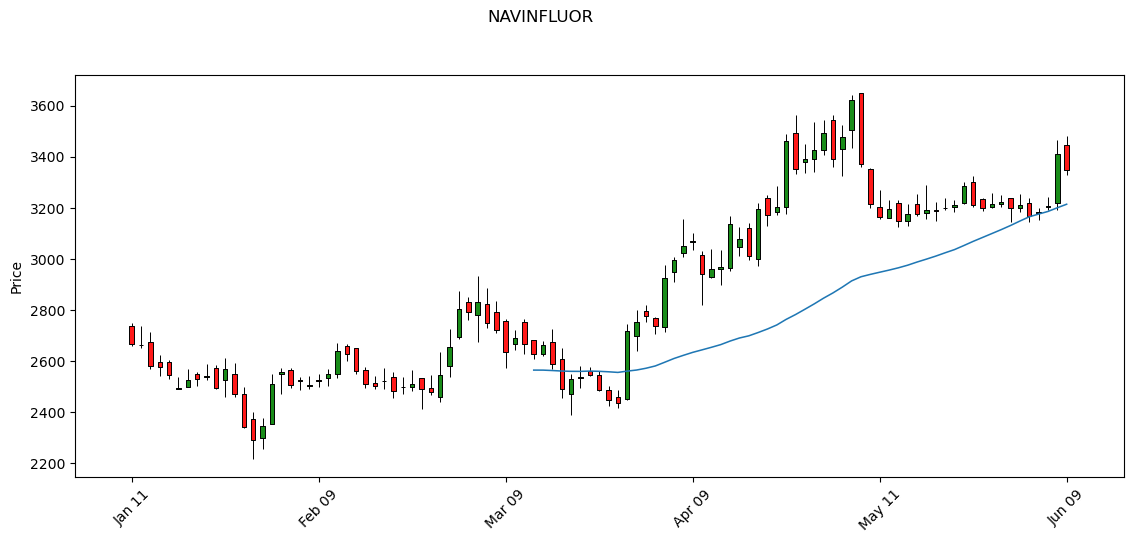

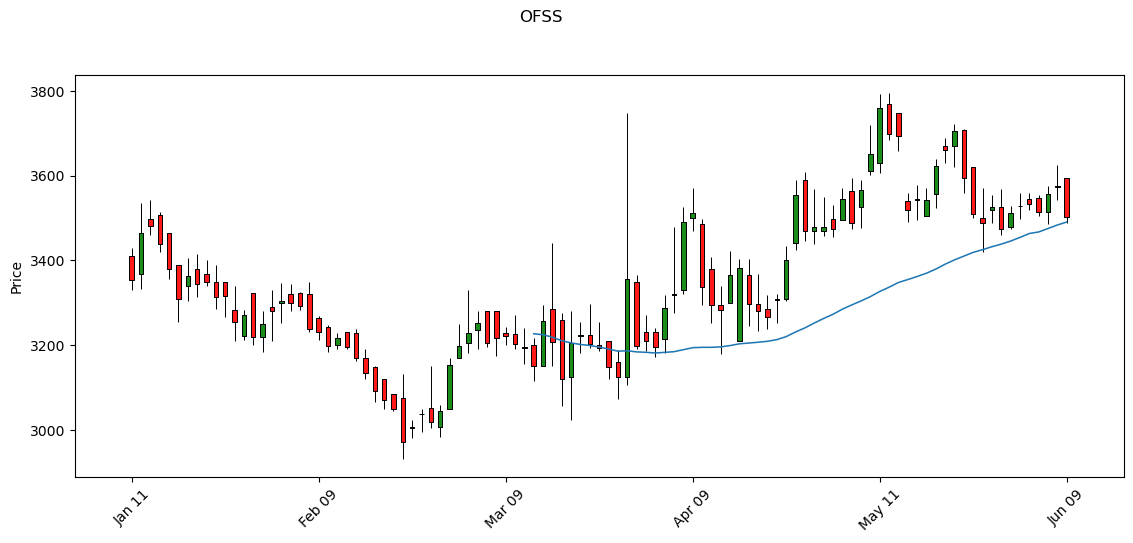

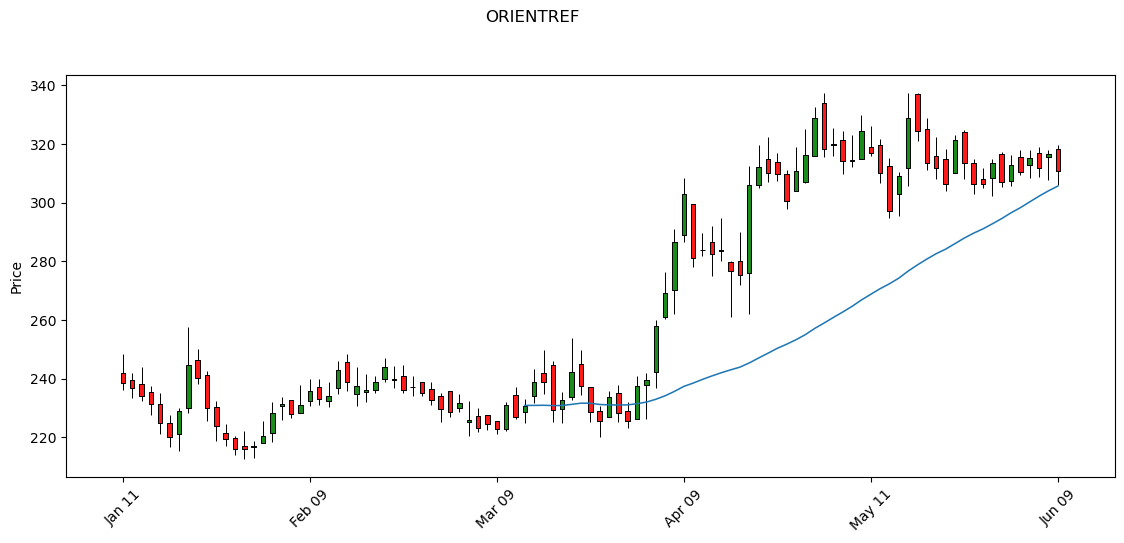

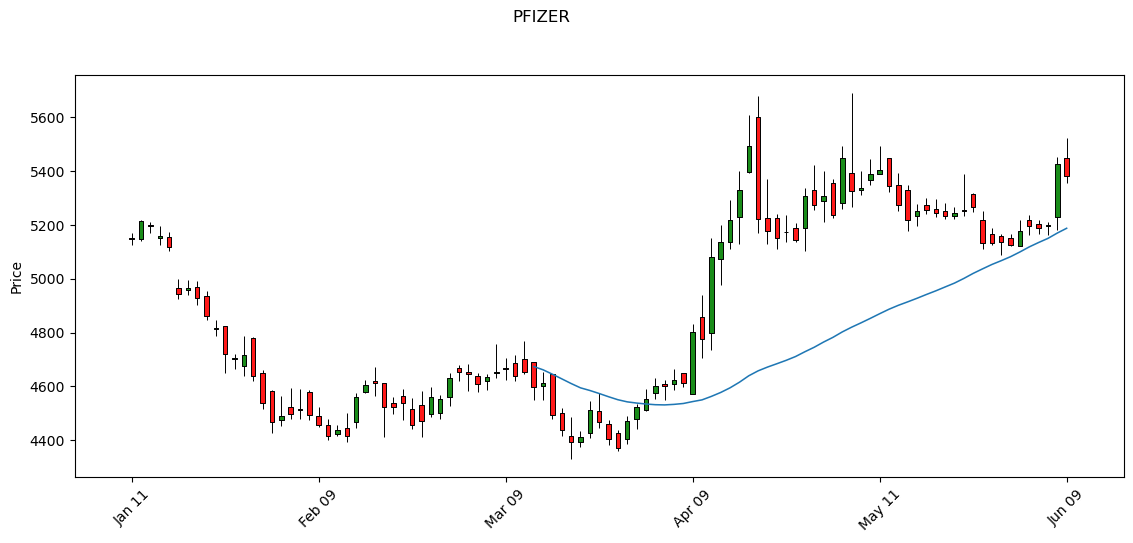

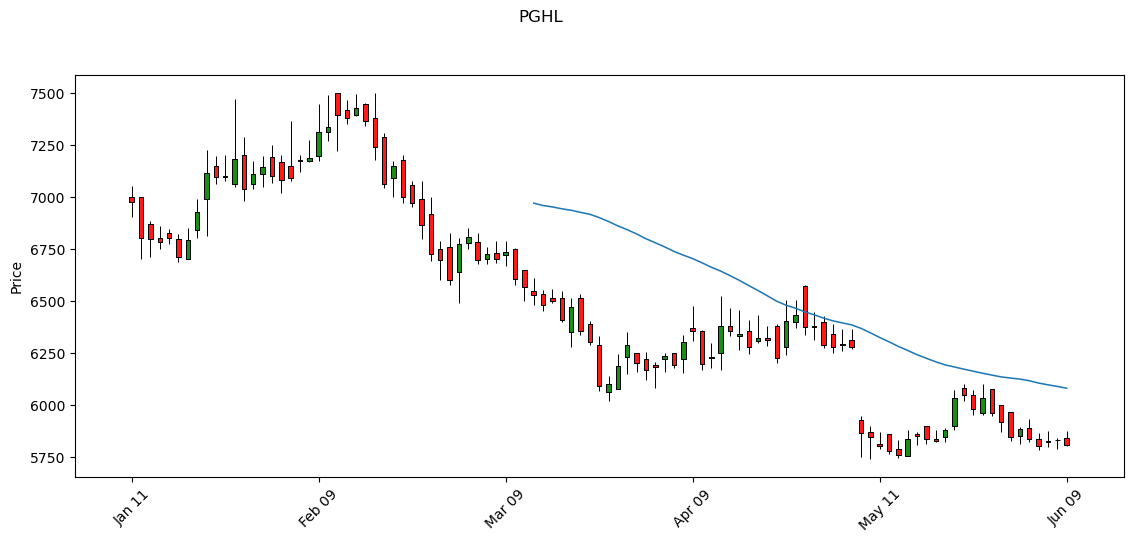

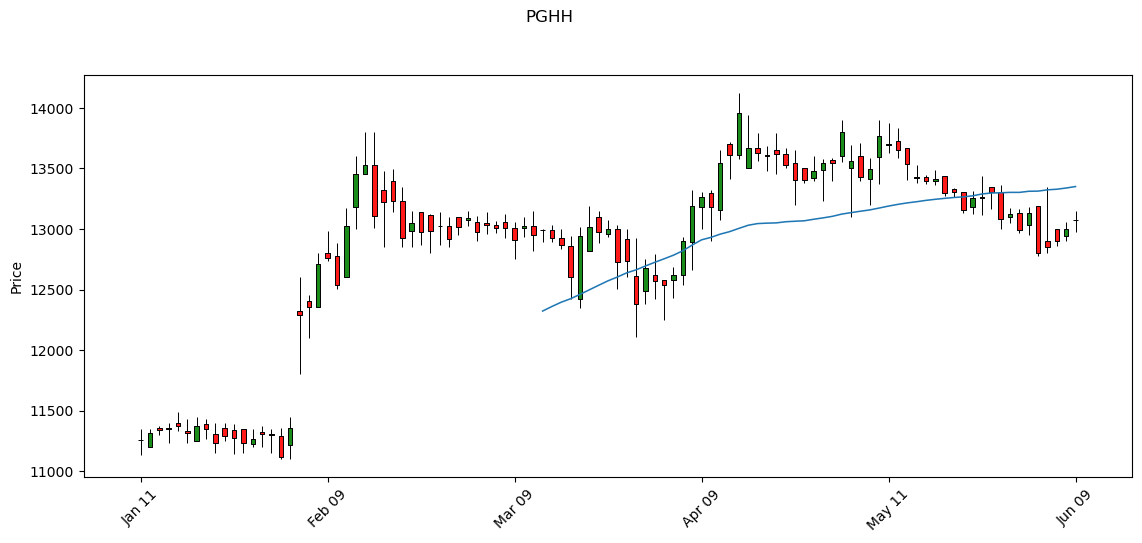

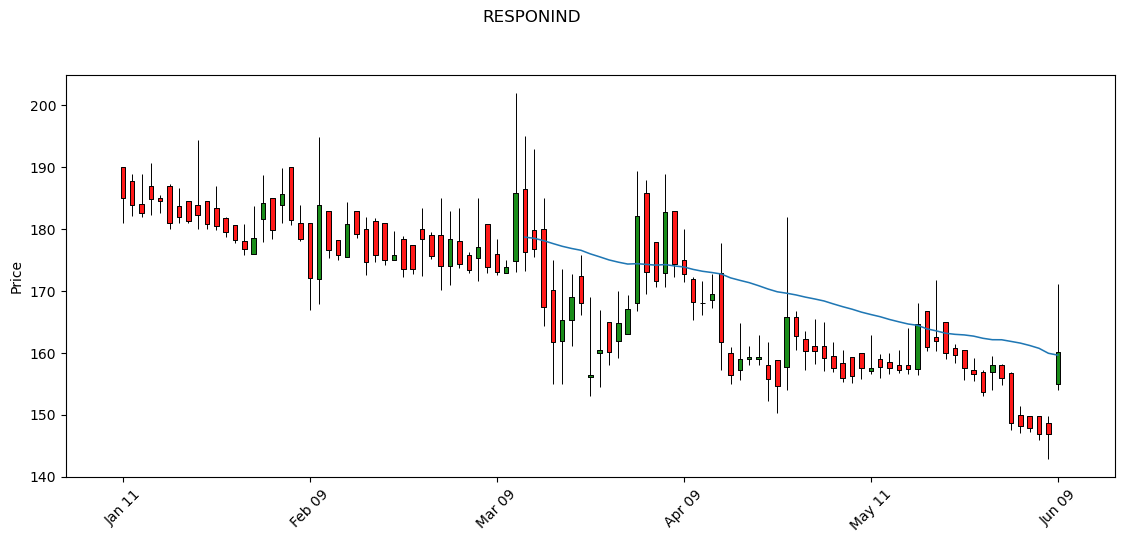

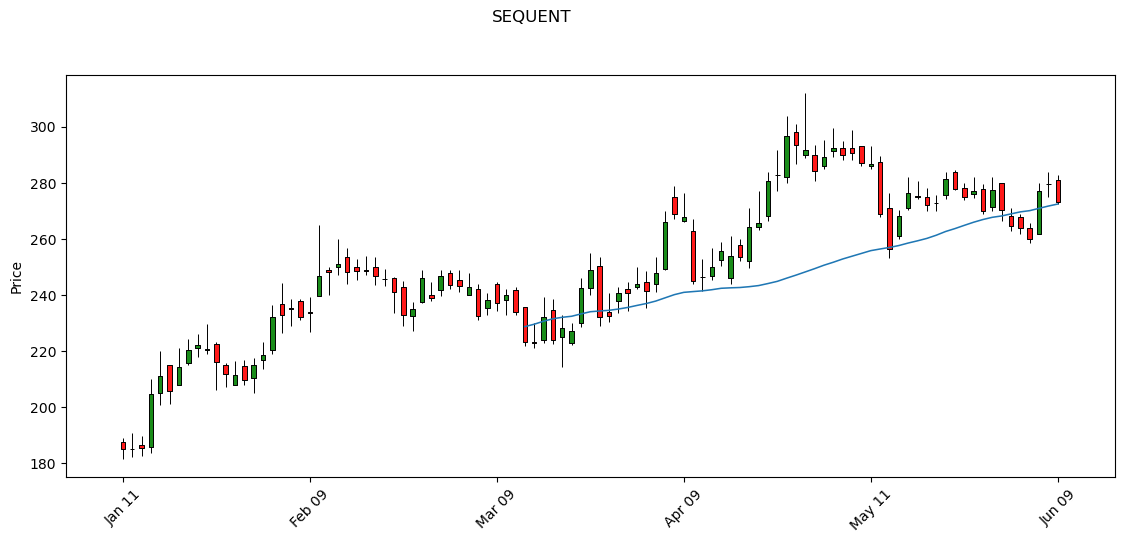

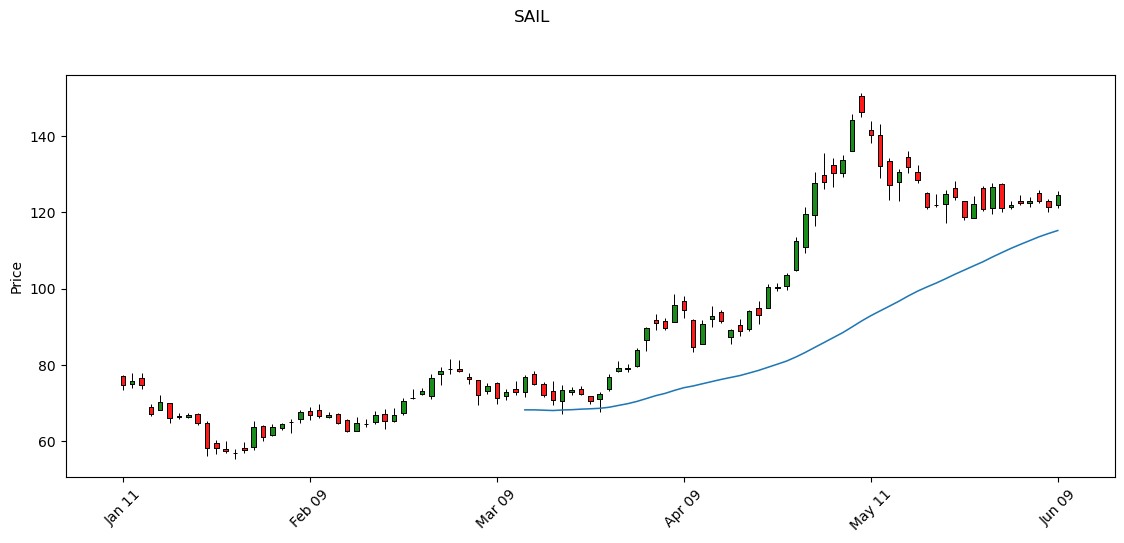

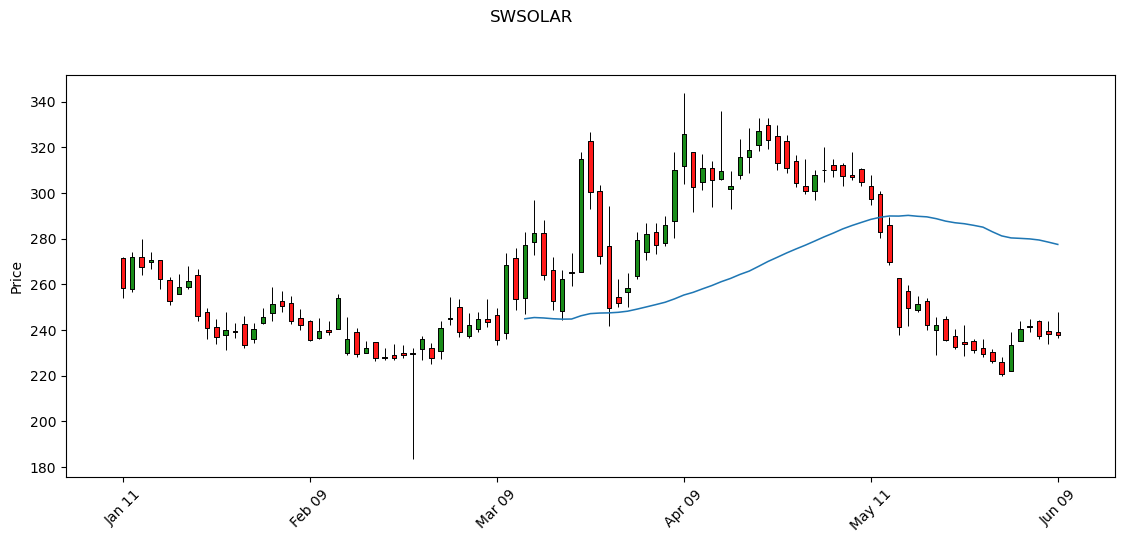

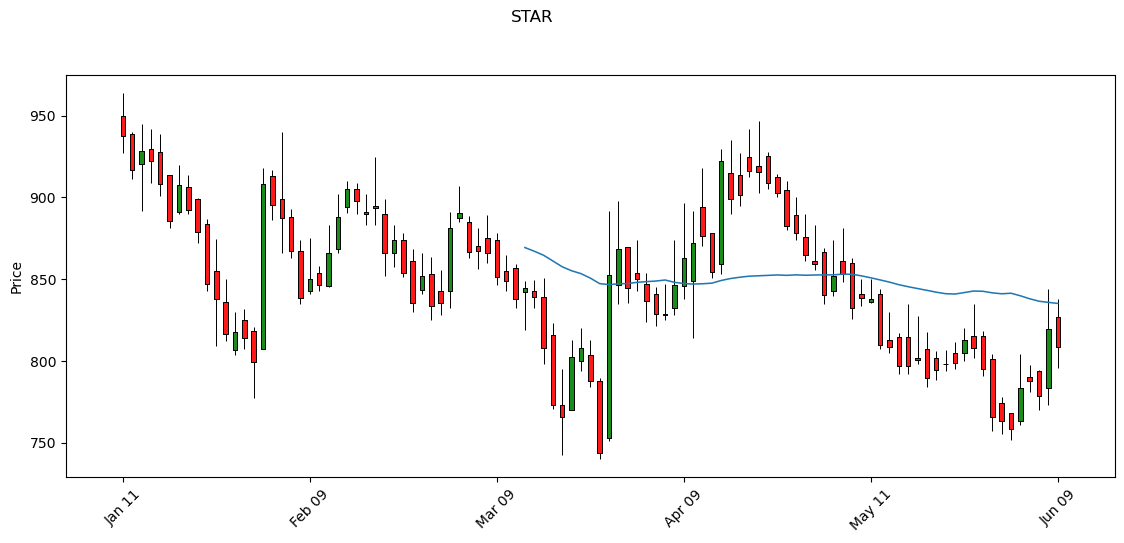

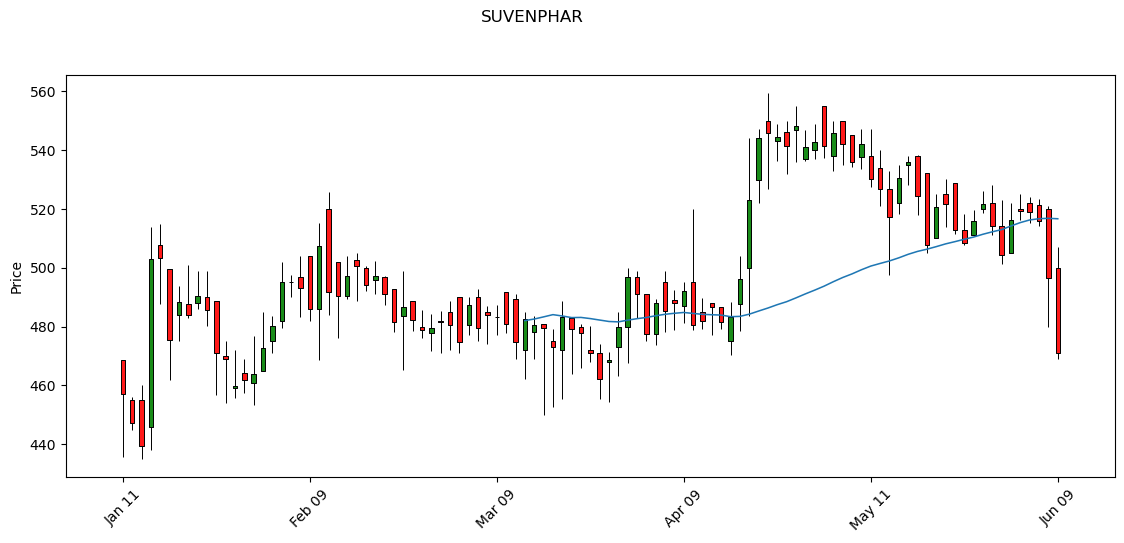

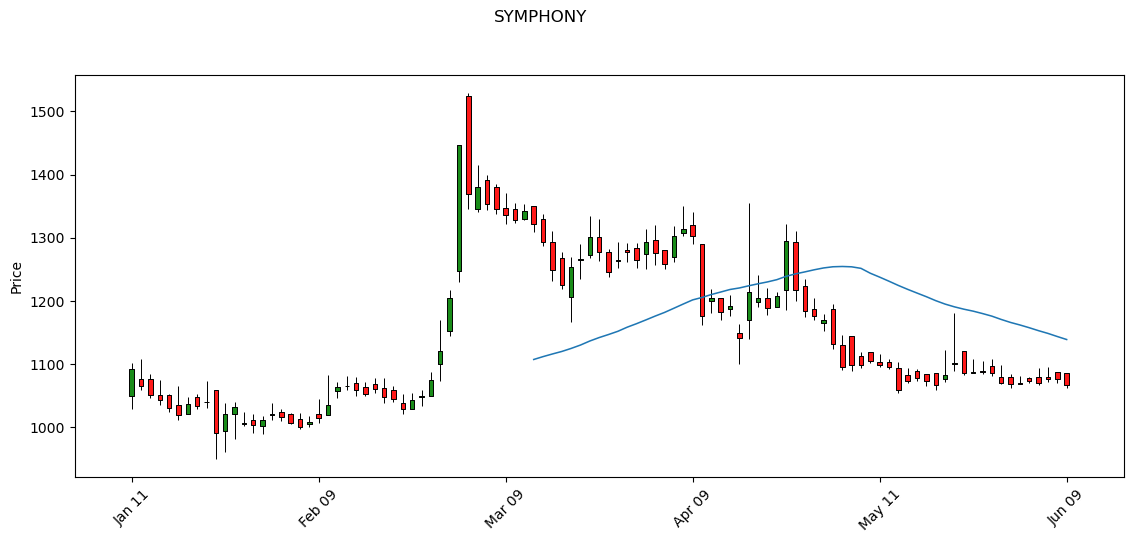

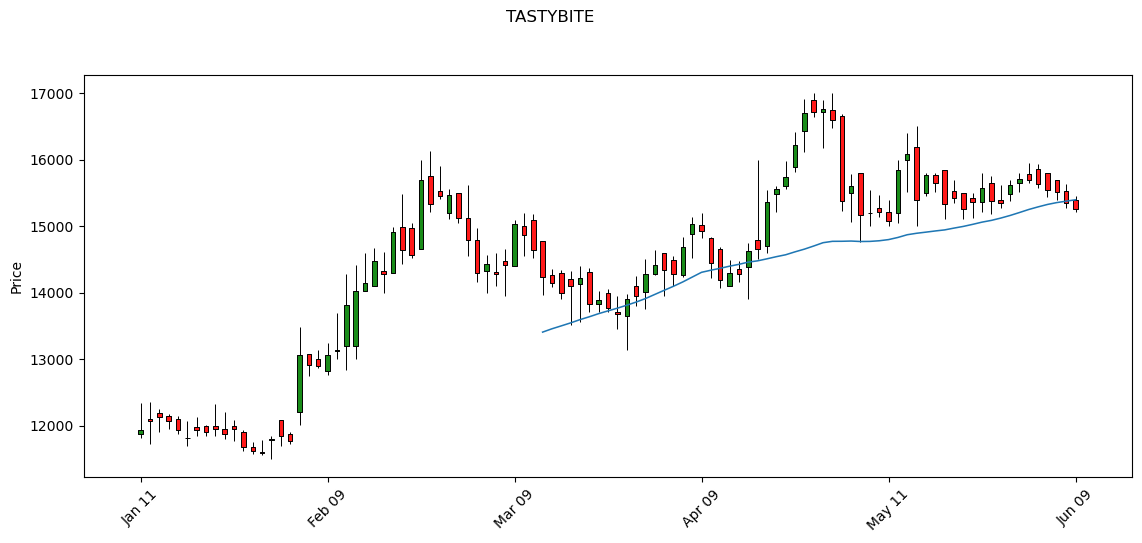

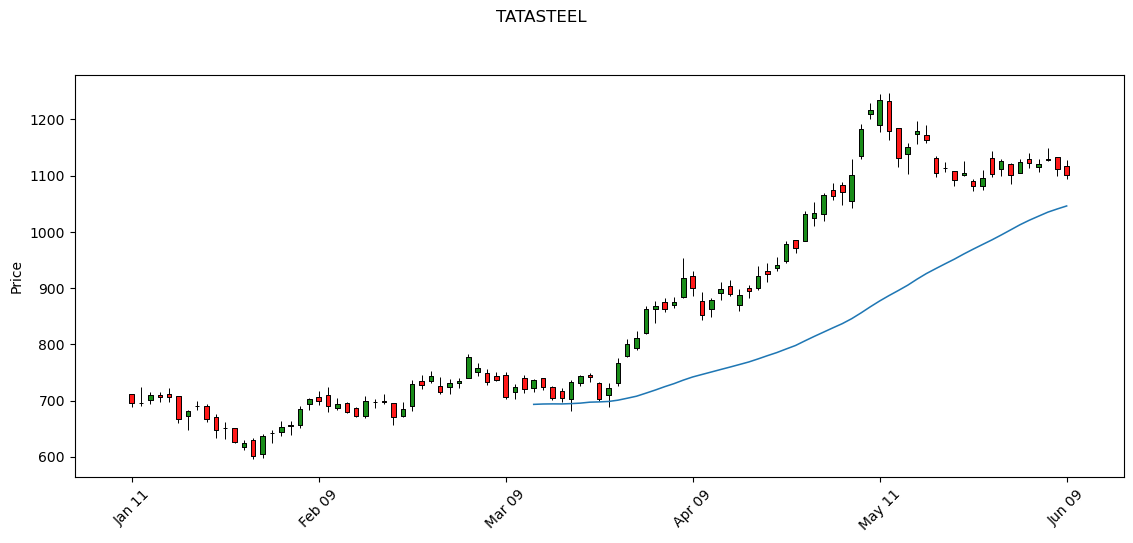

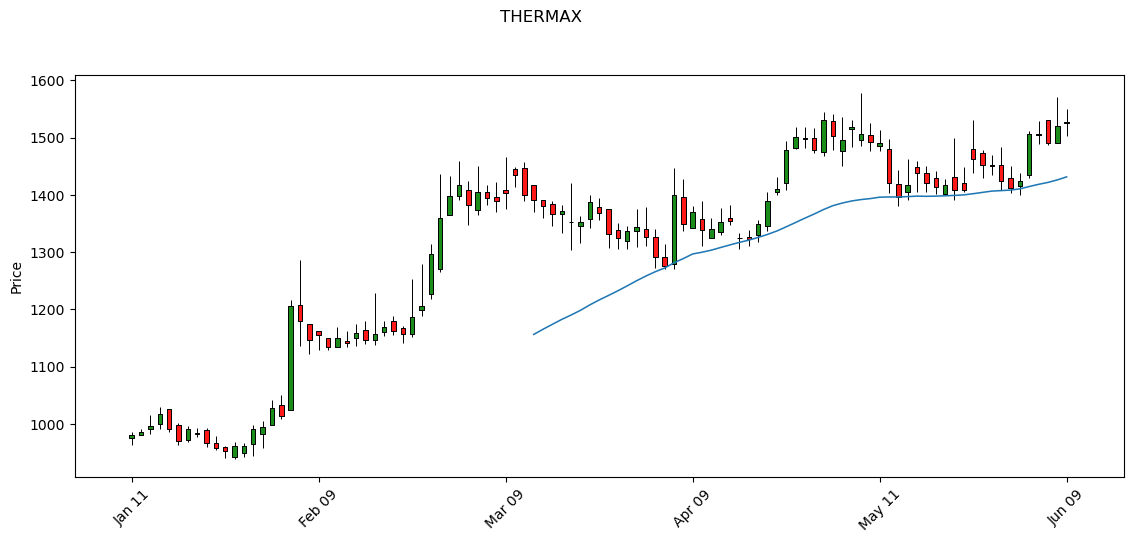

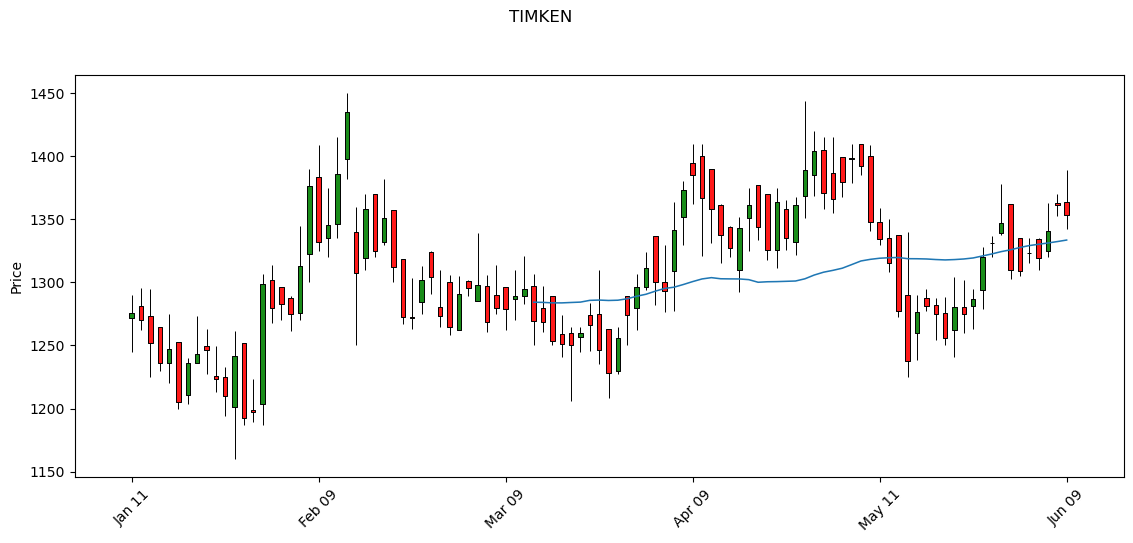

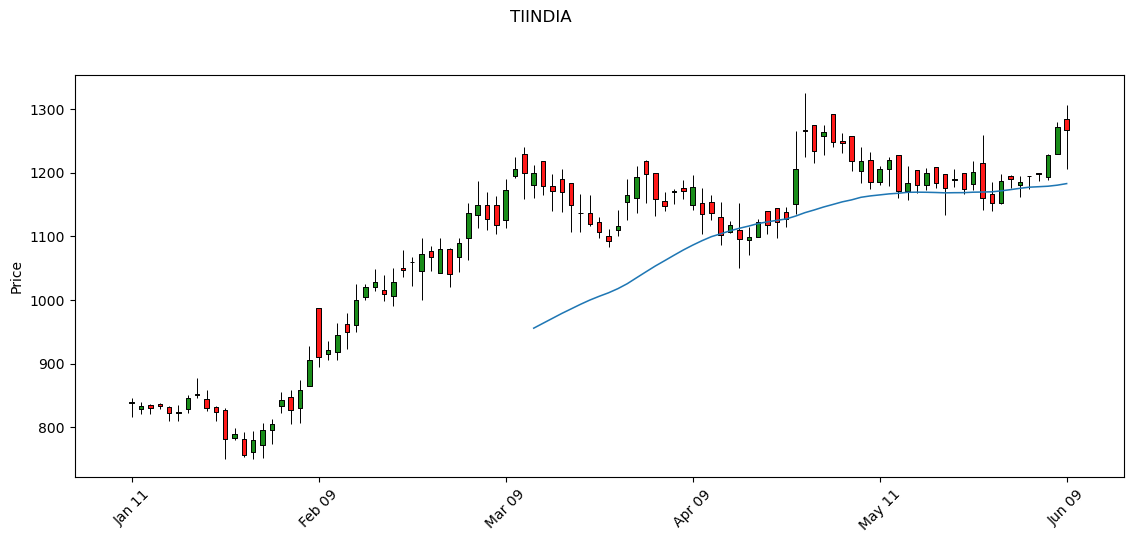

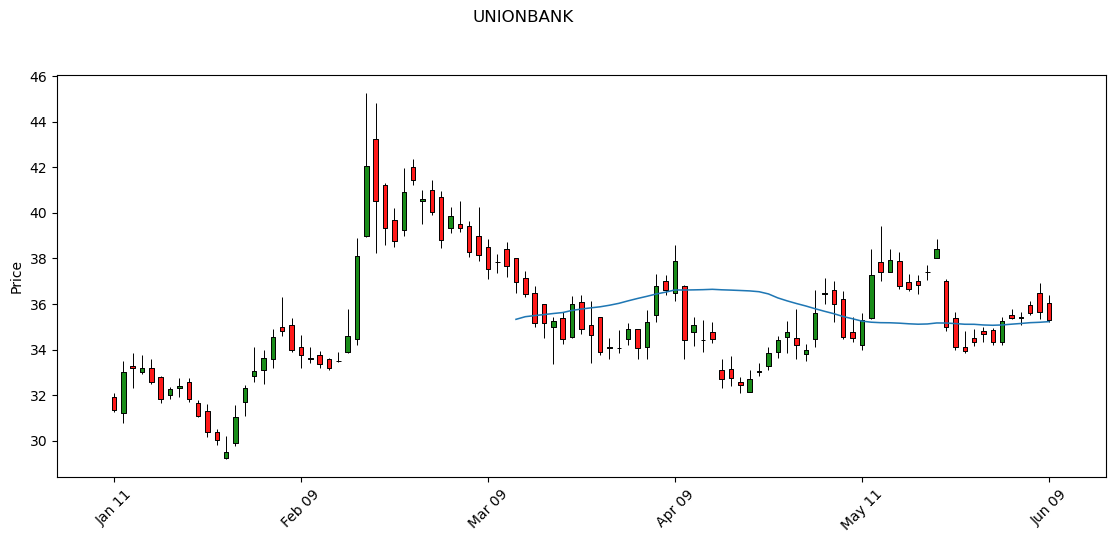

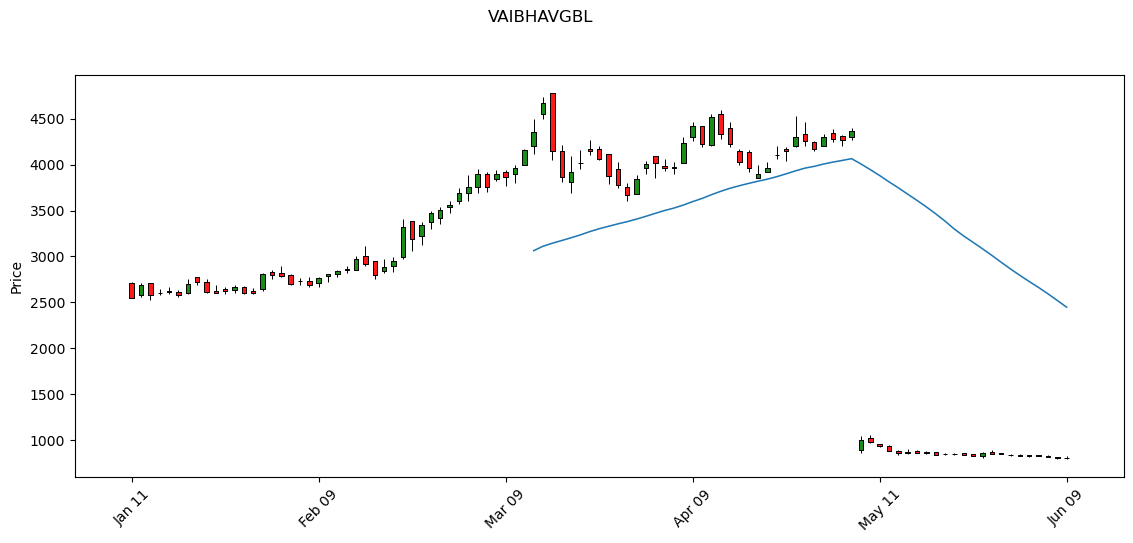

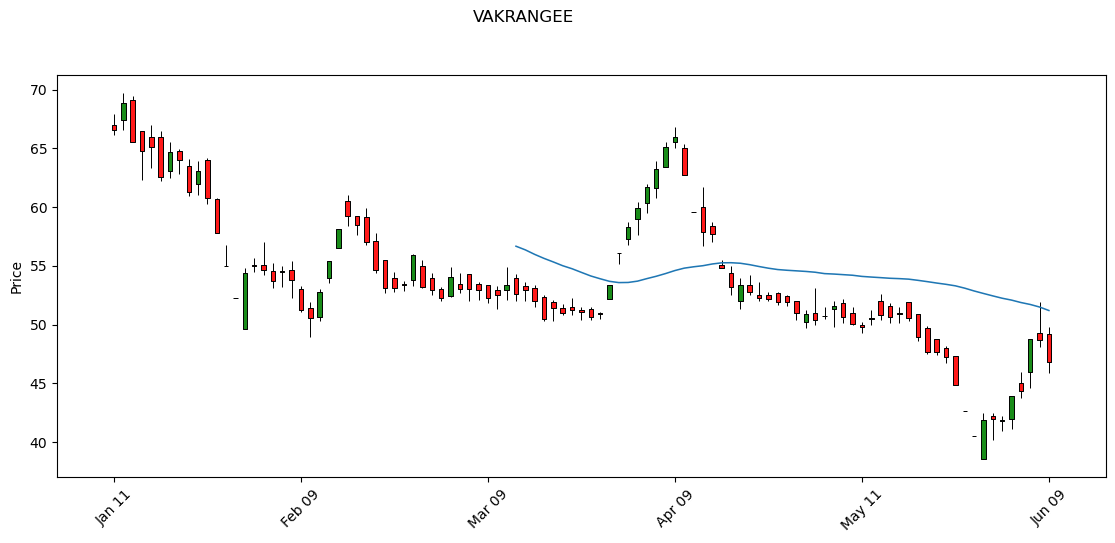

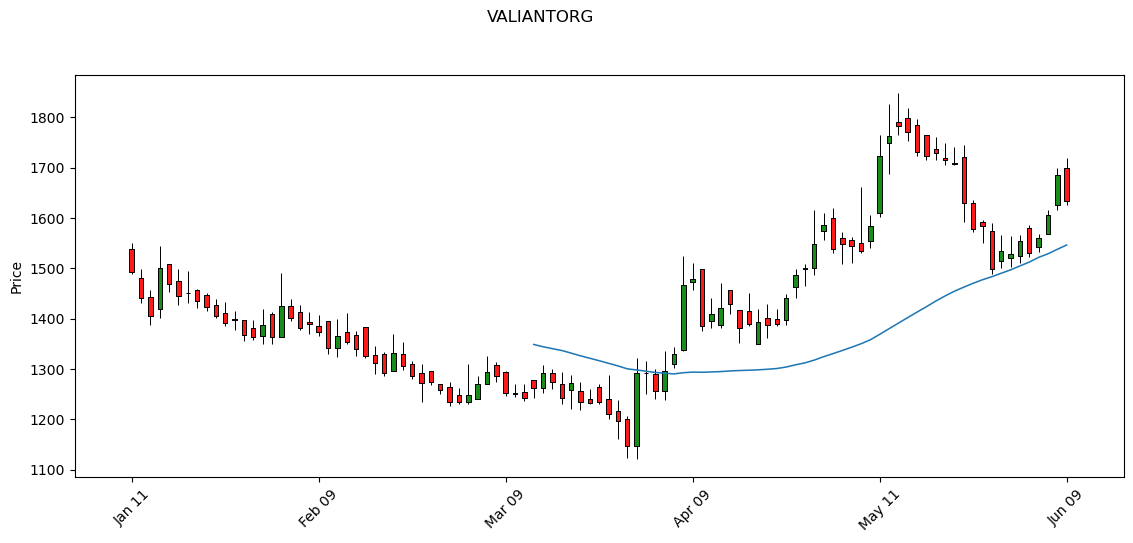

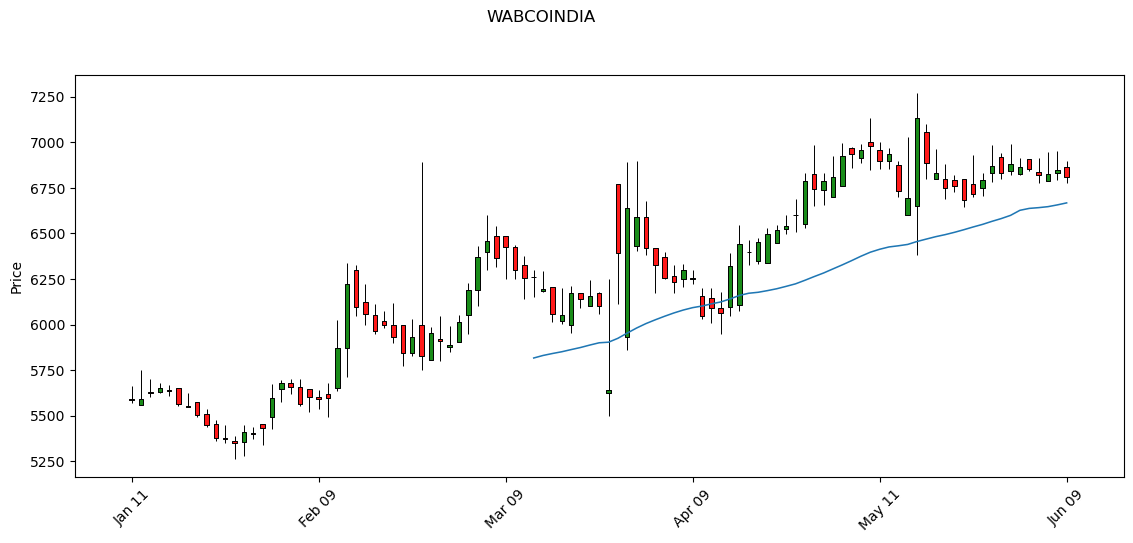

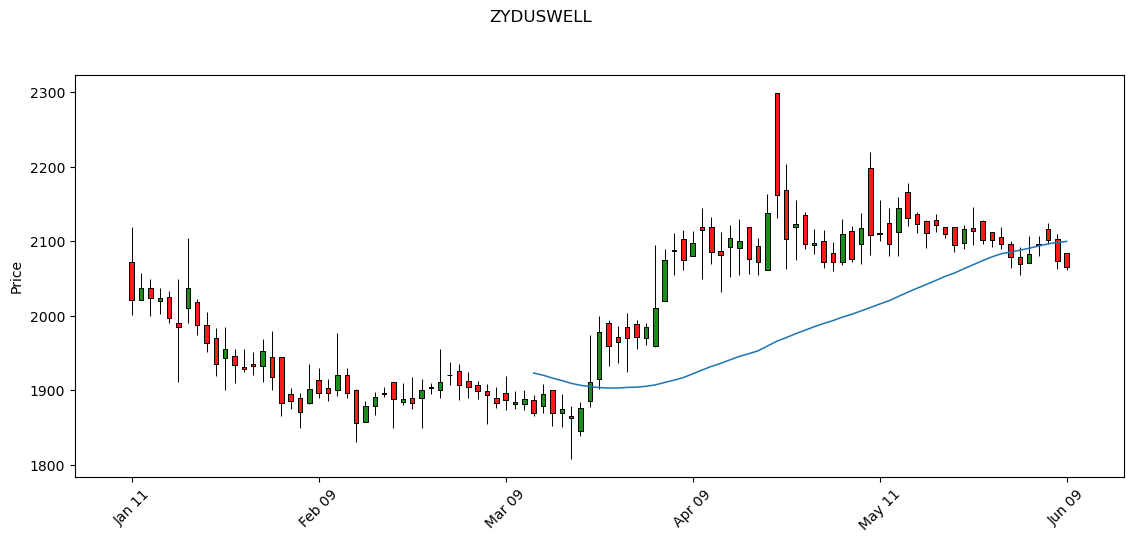

In [23]:
for index,row in nifty.iterrows():
    symbol=row["Symbol"]
    df=pd.read_csv(f'stocks/{symbol}.csv',index_col=0, parse_dates=True)
    
    if df.shape[0]> 1:
        df["44_obs_for_SMA"] = df["Close"].rolling(window=10).mean()
        sma5=df["44_obs_for_SMA"][-20]
        sma4=df["44_obs_for_SMA"][-8]
        sma3=df["44_obs_for_SMA"][-6]
        sma2=df["44_obs_for_SMA"][-4]
        sma1=df["44_obs_for_SMA"][-1]
        if sma5>sma1:
            mpf.plot(df,type='candle',title = f"{symbol}",figratio=(38,15),mav=44,style=s)

# Get live data of stocks

In [11]:
nse = Nse()

In [12]:
nse

In [17]:
q = nse.get_quote('infy')

In [19]:
q["lastPrice"]

1422.5